**** Credit Approval Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


## The story behind The Data

Credit score cards are a common risk control method in the financial industry. 
The industry uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. 
The bank is able to decide whether to issue a credit card to the applicant. 
Credit scores can objectively quantify the magnitude of risk. 
As such, in this scenario, our bank HereIsTheMoney would like to find out what are the main factors that allow them to approve or deny a credit card to a client, and ultimately have an automated logic to identify these cases before they come to light, thus saving costs as well as increasing its reputation at the same time.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce1b7bae3ed7c45449f75)**

# Data Description
In this task, few datasets are provided:

1. **`application_record.csv` -** this file contains appliers personal information, which you could use as features for data enrichment, in order to get better insights on the business use-case. The file contains ~438K records, and 18 columns.
The relevant columns this file has are:

	- `ID` - client number. Unique identifier for the customer holding the account
    - `AMT_INCOME_TOTAL` - annual income
    - `NAME_INCOME_TYPE` - income category
    - `NAME_EDUCATION_TYPE` - education level
    - `NAME_FAMILY_STATUS` - martial status
    - `NAME_HOUSING_TYPE` - way of living
    - `DAYS_BIRTH` - Count backwards from current day (0), -1 means yesterday
    - `DAYS_EMPLOYED` - Start date of employment; Count backwards from current day(0). If positive, person unemployed.
    - `OCCUPATION_TYPE` - Occupation
    
2. **`credit_record.csv` -** contains records users transactions of credit card. This dataset contains ~200K transactions, and has 3 columns:

    - `ID` - Client number
    - `MONTHS_BALANCE` - Record month; The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
    - `STATUS` - Status; A mapping column between a numerical value, and a range of time past due. Specifically - 0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month X: No loan for the month

3. **`enriched_demographics_client.csv`** - this dataset contains some additional demographic information about each client. Specifically, it contains:
 
     - `ID` - Client number
     - `CODE_GENDER` - M (male) / F (female) of the client’s identity
     - `CNT_CHILDREN` - number of children
     - `CNT_FAM_MEMBERS` - Family size

4. ****`enriched_flags_client.csv`**** - this dataset contains some additional flags about each client. Specifically, it contains:
    - `ID` - Client number
    - `FLAG_MOBIL` - Is there a mobile phone
    - `FLAG_WORK_PHONE` - Is there a work phone
    - `FLAG_PHONE` - Is there a phone
    - `FLAG_EMAIL` - Is there an email
    - `FLAG_OWN_CAR` - Y (yes) / N (no) flag indicates if the client has a car
    - `FLAG_OWN_REALTY` - Y(yes) / N (no) indicates if the client has a property

# SQL tasks

1. How many clients that have more then 2 children does the bank have?
2. What is the average family size per each occupation type (based on fam_members)?
3. Out of the men clients, what is the count of transaction that were made, per each fam_member value (hint: treat fam_members as a dimension, not a metric)?
4. The bank is interested in knowing per each “status” (see above), who are the client IDs with top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that.
5. Let’s define a new column called “has_car_and_realty”. The bank thinks these people are affluent compared to others. Its logic is as follows:
- If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
- else ⇒ 0
Once we have this column, the bank would like to know per each has_car_and_realty category:

    1. how many unique clients do we have, 
    2. as well as how many transactions each category (1, 0) have had, 
    3. and what is the ratio between the two: unique_clients / num_transactions

### Question 1 
How many clients that have more then 2 children does the bank have?
<br>
Answer: **6075 clients have more than 2 children.**

In [1]:
SELECT COUNT(ID)
FROM enriched_demographics_client
WHERE CNT_CHILDREN > 2

count
0   6075

### Question 2
What is the average family size per each occupation type (based on fam_members)?
<br><br>Answer:

- Accountants: 2.22
- Cleaning staff: 1.93
- Cooking staff: 2.16
- Core staff: 2.38
- Drivers: 2.44
- High skill tech staff: 2.33
- HR staff: 1.9
- IT staff: 2.05
- Laborers: 2.28
- Low-skill Laborers: 2.35
- Managers: 2.39
- Medicine staff: 2.21
- Private service staff: 2.08
- Realty agents: 2.4
- Sales staff: 2.29
- Secretaries: 2.23
- Security staff: 2.13
- Waiters/barmen staff: 2.08
- null: 2

In [2]:
-- Start writing your SQL query here 
SELECT ar.OCCUPATION_TYPE, ROUND(AVG(ed.CNT_FAM_MEMBERS),2)
FROM application_record ar 
JOIN credit_record cr
ON ar.id = cr.id
JOIN enriched_demographics_client ed
ON ed.id = cr.id
GROUP BY ar.OCCUPATION_TYPE

occupation_type  round
0             Accountants   2.22
1          Cleaning staff   1.93
2           Cooking staff   2.16
3              Core staff   2.38
4                 Drivers   2.44
5   High skill tech staff   2.33
6                HR staff   1.90
7                IT staff   2.05
8                Laborers   2.28
9      Low-skill Laborers   2.35
10               Managers   2.39
11         Medicine staff   2.21
12  Private service staff   2.08
13          Realty agents   2.40
14            Sales staff   2.29
15            Secretaries   2.23
16         Security staff   2.13
17   Waiters/barmen staff   2.08
18                   None   2.00

### Question 3
Out of the men clients, what is the count of transaction that were made, per each fam_member value (hint: treat fam_members as a dimension, not a metric)?
<br><br>Answer: cnt_fam_members:transactions_per_male

1:6502

2:27014

3:11253

4:6156

5:806

6:48

7:31

8:0

9:0

11:0

In [3]:
SELECT ed.CNT_FAM_MEMBERS,COUNT(cr.ID) AS transactions_per_male
FROM credit_record cr
FULL OUTER JOIN enriched_demographics_client ed
ON cr.id = ed.id
WHERE ed.CODE_GENDER = 'M'
GROUP BY ed.CNT_FAM_MEMBERS



cnt_fam_members  transactions_per_male
0                 1                   6502
1                 2                  27014
2                 3                  11253
3                 4                   6156
4                 5                    806
5                 6                     48
6                 7                     31
7                 8                      0
8                 9                      0
9                11                      0
10               15                     23

### Question 4:
The bank is interested in knowing per each “status” (see above), who are the client IDs with top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that.


In [4]:
WITH ranked_data AS (
    SELECT ar.ID, cr.STATUS, sum(ar.AMT_INCOME_TOTAL) as total_income,
           RANK() OVER (PARTITION BY cr.STATUS ORDER BY sum(ar.AMT_INCOME_TOTAL) DESC) as top_rank,
           RANK() OVER (PARTITION BY cr.STATUS ORDER BY sum(ar.AMT_INCOME_TOTAL) ASC) as bottom_rank
    FROM application_record ar
    JOIN credit_record cr
    ON ar.ID = cr.ID
    GROUP BY ar.ID, cr.STATUS
)

SELECT ranked_data.ID, ranked_data.STATUS, ranked_data.total_income, ranked_data.top_rank, ranked_data.bottom_rank
FROM ranked_data
WHERE ranked_data.top_rank <= 5 OR ranked_data.bottom_rank <= 5
ORDER BY ranked_data.STATUS, ranked_data.top_rank, ranked_data.bottom_rank;

id status  total_income  top_rank  bottom_rank
0   5116003      0     8100000.0         1        23395
1   5018492      0     8100000.0         1        23395
2   5022505      0     7200000.0         3        23394
3   5114260      0     6885000.0         4        23393
4   5009698      0     6750000.0         5        23392
..      ...    ...           ...       ...          ...
88  5117985      X       32400.0     10069            4
89  5117989      X       32400.0     10069            4
90  5088975      X       31500.0     10072            2
91  5146563      X       31500.0     10072            2
92  5045657      X       30150.0     10074            1

[93 rows x 5 columns]

### Question 5:

Let’s define a new column called “has_car_and_realty”. The bank thinks these people are affluent compared to others. Its logic is as follows:
- If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
- else ⇒ 0
Once we have this column, the bank would like to know per each has_car_and_realty category:

    1. how many unique clients do we have, 
    2. as well as how many transactions each category (1, 0) have had, 
    3. and what is the ratio between the two: unique_clients / num_transactions

Notes: NULLIF() is a function that returns a null value if the two arguments are equal. In this case, it is checking if COUNT(cr.ID) is equal to 1, if it is true it returns a null value otherwise it returns the result of the division of COUNT(DISTINCT cr.ID) and COUNT(cr.ID)

The reason for this is to avoid division by zero error. It would cause an error if COUNT(cr.ID) is zero, because you cannot divide by zero. So, by using the NULLIF function, it checks if the count of credit_record.ID is equal to zero, if it is true it returns a null value, otherwise it returns the result of the division of COUNT(DISTINCT cr.ID) and COUNT(cr.ID)

In [5]:
WITH flag AS (
    SELECT ID, FLAG_OWN_CAR, FLAG_OWN_REALTY,
CASE
    WHEN FLAG_OWN_CAR = 'Y' THEN 1
    WHEN FLAG_OWN_REALTY = 'Y' THEN 1
    ELSE 0
END AS has_car_and_realty
FROM enriched_flags_client
)

SELECT 
flag.has_car_and_realty,
COUNT(DISTINCT cr.ID) as unique_clients,  
COUNT(cr.ID) as num_transactions, 
ROUND(COUNT(DISTINCT cr.ID)/NULLIF(CAST(COUNT(cr.ID) AS DECIMAL),1),2) as ratio
FROM flag
JOIN credit_record cr
ON cr.ID = flag.ID
GROUP BY flag.has_car_and_realty

has_car_and_realty  unique_clients  num_transactions  ratio
0                   0            6530             31703   0.21
1                   1           26115            123813   0.21

### Creating a weighted credit rating

In [6]:
WITH credit_rating AS
(SELECT ID, SUM(CASE STATUS 
                WHEN '0' THEN 1
                WHEN '1' THEN 2
                WHEN '2' THEN 3
                WHEN '3' THEN 4
                WHEN '4' THEN 5
                WHEN '5' THEN 6
                WHEN 'C' THEN 0
                END) / COUNT(CASE STATUS 
                              WHEN '0' THEN 1
                              WHEN '1' THEN 1
                              WHEN '2' THEN 1
                              WHEN '3' THEN 1
                              WHEN '4' THEN 1
                              WHEN '5' THEN 1
                              WHEN 'C' THEN 1
                              END) as AVERAGE_WEIGHT
FROM credit_record
WHERE STATUS NOT IN ('X')
GROUP BY ID)

SELECT AVERAGE_WEIGHT, COUNT(AVERAGE_WEIGHT)
FROM credit_rating
GROUP BY 1
ORDER BY 1



average_weight  count
0               0  19611
1               1  16054
2               2    189
3               3     38
4               4     25
5               5     15
6               6     16

# Tableau

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Number of bank clients
    - % of clients with higher education
    - etc.
2. **A Bar Chart**, for example, comparing the number of clients in each client segment (custom defined as a combination of demographic characteristics).
3. **A Stacked Bar Chart with Quick Table Calculation**, for example, for each Family Status comparing the ratio of car owners and non-car owners.
4. **A Highlight Table (Heatmap)**, for example, between education and income level (can be custom-defined based on Amt Income Total), where each cell corresponds to absolute or relative numbers of clients in each combination. 
5. **A Circle View** with three different values on X axis, Y axis, and Size.
6. **A Pareto Analysis** based on a custom-defined **client segment** to answer a question: Which client segments make up 80% of all client base? 
    - Segment can include values from the demographic and/or record information about the client. For example, Education | Income | Marital status | Owning a car | No children.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard.
8. At least **1 more visualization of your choice** adding value to your analysis.

[Credit Card Analyis - Tableau](https://public.tableau.com/views/CreditCardAnalysis_16756350111760/CreditCardAnalysis?:language=en-GB&:display_count=n&:origin=viz_share_link)


![Screenshot 2023-02-06 at 15.22.11](Screenshot%202023-02-06%20at%2015.22.11.png)


![Screenshot 2023-02-06 at 15.22.32](Screenshot%202023-02-06%20at%2015.22.32.png)


![Screenshot 2023-02-06 at 15.22.48](Screenshot%202023-02-06%20at%2015.22.48.png)


_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://cms.master.school/final-project-jan23)

# Python Analysis

I decided to do my python analysis before the tableau questions, so that I could first perform the data wrangling, create a credit score and transaction count in order to join the tables for export as one .csv file to be used in tableau. 

### Objective 

With reference to the story behind the data, my initial objective in this analysis was to use the limited credit card transaction information to create a weighted calculation of a basic credit score. My exploratory analysis was directed at finding correlations between client demographics and their calulated scores based on clients owning and using credit cards. The findings could then be used in the analysis of all clients to give some sort of indication of future defaults and magnitude of risk when deciding whether to issue a credit card based on client segments. However, due to the limited data available, the objective was revised to determining target segments for credit card ownership. Although python was used for wrangling and initial exploratory analysis, most of my exploratory analysis was done in Tableau once the decision to pivot the objective was made. 
    
### Overview
The analysis is based on four datasets:

- **application_record_df**: Contains personal information of 438,510 unique clients from 438,557 total rows and 9 columns.
- **credit_record_df**: Contains credit card transaction information for 41,628 unique clients from approximately 200,000 total rows and 3 columns. The data was grouped and aggregated to produce a dataset with unique client IDs.
- **enriched_demographics_client_df**: Contains additional demographic information for 438,510 unique clients from 438,557 total rows and 4 columns.
- **enriched_flags_client**: Contains additional flags for material assets of 438,510 unique clients from 438,557 total rows and 4 columns.

Notes on credit score calculation:

  - The credit score calculated is based on the average number of days it takes a client to pay off transactions, not a typical credit score.
  - The transaction refers to a month in which the credit card was used and can be thought of as the number of months a client used their credit card.

## Contents:
### Part 1:

Part 1 only focuses on the data where clients own credit cards. 

- [Visual Exploration](##Visual_Exploration)
- [Data Wrangling](#Data_Wrangling)
- [Summary Statistics](#Summary_Statistics)
- [Assessing Columns](#Assessing_Columns)
- [Exploratory Analysis](#Exploratory_Analysis)

### Part 2:

Part 2 focuses on both clients who own a credit card and those who do not. 

The data wrangling methods used in this section are very similar to those used in Part 1, after the score_df (containing credit card clients) was joined with the rest of the client data. Many of the functions from Part 1 were reused in this section. Even though some of the code in Part 1 was repeated and could have been removed from the notebook, the code has been left in as it formed a crucial part of the exploration and decision-making process for reassessing the original research question.

- [Creating a df containing all clients](##Creating_a_df_containing_all_clients)
- [Data Wrangling 2](##Data_Wrangling_2)
- [Summary Statistics 2](##Sumamry_Statistics_2)
- [Distribution Analysis for credit card and non-credit card holders](#Distribution_Analysis_for_credit_card_and_non-credit_card_holders. )
- [Exporting the dataset](##Exporting_the_dataset)
- [Additional Exploration](##Additional_Exploration)
- [Conclusions](#Conclusions)
- [Data Enrichment](#Data_Enrichment)
- [Final thoughts on improving the current data](#)

In [7]:
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from datetime import datetime, timedelta
import math

# Setting seaborn grid style
sns.set_style("darkgrid")

In [8]:
# Load data first and see its "head"
application_record_df = pd.read_csv("application_record.csv")
credit_record_df = pd.read_csv("credit_record.csv")
enriched_demographics_client_df = pd.read_csv("enriched_demographics_client.csv")
enriched_flags_client_df = pd.read_csv("enriched_flags_client.csv")

## Visual Exploration

In [9]:
application_record_df.head(3)

DAYS_EMPLOYED NAME_FAMILY_STATUS  ...  AMT_INCOME_TOTAL NAME_INCOME_TYPE
0          -4542     Civil marriage  ...          427500.0          Working
1          -4542     Civil marriage  ...          427500.0          Working
2          -1134            Married  ...          112500.0          Working

[3 rows x 9 columns]

In [10]:
credit_record_df[credit_record_df['ID'] == 5105451]


ID  MONTHS_BALANCE STATUS
0       5105451             -28      X
24941   5105451             -17      X
57033   5105451              -8      C
68324   5105451             -34      X
154621  5105451             -37      X
171490  5105451             -18      X
193448  5105451              -7      C
207994  5105451             -33      X

In [11]:
enriched_flags_client_df.head(3)

ID FLAG_OWN_CAR  ... FLAG_PHONE  FLAG_EMAIL
0  5008804            Y  ...          0           0
1  5008805            Y  ...          0           0
2  5008806            Y  ...          0           0

[3 rows x 7 columns]

In [12]:
enriched_demographics_client_df.head()

ID CODE_GENDER  CNT_CHILDREN  CNT_FAM_MEMBERS
0  5008804           M             0                2
1  5008805           M             0                2
2  5008806           M             0                2
3  5008808           F             0                1
4  5008809           F             0                1

In [13]:
# how many unique ID in application record?
len(set(application_record_df['ID'])), application_record_df.shape

(438510, (438557, 9))

In [14]:
# how many unique ID in credit record?
len(set(credit_record_df['ID']))

41628

In [15]:
# how many unique ID in enriched_demographics_client_df?
len(set(enriched_demographics_client_df['ID'])), enriched_demographics_client_df.shape

(438510, (438557, 4))

In [16]:
# how many unique ID in enriched_flags_client_df?
len(set(enriched_flags_client_df['ID'])), enriched_flags_client_df.shape

(438510, (438557, 7))

In [17]:
# how many IDs do two tables share?
len(set(application_record_df['ID']).intersection(set(credit_record_df['ID'])))

32645

In [18]:
# Copy all the dataframes so that they can be accessed for the second part of the analysis

app_record_copy = application_record_df.copy()
credit_record_copy = credit_record_df.copy()
enriched_demo_copy = enriched_demographics_client_df.copy()
enriched_flags_copy = enriched_flags_client_df.copy()

## Data Wrangling

1. The credit status per client is not aggragated and a new weighted credit score can be calculated to better represent the credit history of each client.
2. The tables need to be joined according to the calculated credit score mentioned above, so that we can link the demographic infomation pertaining to each client and their credit score. 
3. Null values exist in the demographic data, where we have clients with a credit history, but no demographic data available.
5. Null values exist in the occupation column, where these can be replaced with 'Unknown'. 
4. Inconsistency in data values. The values in columns FLAG_OWN_CAR and FLAG_OWN_REALTY are represented as Y(Yes) and N(No), whilst the other flag columns i.e. FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL are represented as 1 and 0. These columns can be casted as boolean datatypes. 
6. Days employed column can be used to create a new column of employed/unemployed.  
7. Columns containing dates need to be calculated and set at datetime datatypes.  
8. Replace positive values in DAYS_EMPLOYED with NaN
9. Replace 'Uknown' values in OCCUPATION_TYPE column with 'Unemployed' where EMPLOYMENT is False
10. Columns with incorrect datatypes i.e.
- ID: int64 to object
- CNT_CHILDREN: float64 --> int
- CNT_FAM_MEMBERS: float64 --> int

### 1. Create a calculated credit score which will serve as an integral part of the analysis

In [19]:
# Create a new dataframe, credit_score_mean_df, which contains the credit score of each client based on a weighted calculation of their current credit score for each transaction.

# Remove all transactions with a status of 'X' as they exclude a loan and provide no historical credit data.
credit_record_copy = credit_record_copy[credit_record_copy['STATUS'] != 'X']

# Assign a weight to each value of the 'STATUS' column based on the average number of days between the current status and loan repayment. 
# For example, loans that were paid off between 0 - 29 days will have a weight of 15 (average days).
credit_record_copy['WEIGHT'] = credit_record_copy['STATUS'].map({'0': 15, '1': 45, '2': 75, '3': 105, '4': 135, '5': 165, 'C': 0})

# Group the credit_record_copy dataframe by 'ID' and calculate the mean of the 'WEIGHT' column to create the credit_score_mean_df dataframe.
# Reset the index of credit_score_mean_df.
credit_score_mean_df = credit_record_copy.groupby('ID').agg({'WEIGHT': 'mean'}).reset_index()

# Rename the columns of credit_score_mean_df to 'ID' and 'SCORE'.
credit_score_mean_df.columns = ['ID','SCORE']

# Group the credit_record_copy dataframe by 'ID' and calculate the standard deviation of the 'WEIGHT' column to create the credit_score_std_df dataframe.
# Reset the index of credit_score_std_df.
credit_score_std_df = credit_record_copy.groupby('ID').agg({'WEIGHT':np.std}).reset_index()

# Rename the columns of credit_score_std_df to 'ID' and 'STANDARD_DEV'.
credit_score_std_df.columns = ['ID','STANDARD_DEV']

In [20]:
# Create another df with number of credit_transactions
credit_transactions = credit_record_copy['ID'].value_counts().reset_index()

# Rename the columns
credit_transactions.columns = ['ID', 'TRANSACTION_COUNT']

credit_transactions

ID  TRANSACTION_COUNT
0      5097014                 25
1      5060320                 22
2      5005180                 21
3      5118017                 21
4      5100296                 21
...        ...                ...
35943  5045548                  1
35944  5136006                  1
35945  5061188                  1
35946  5135849                  1
35947  5017213                  1

[35948 rows x 2 columns]

In [21]:
# assessing the credit_score_std_df

credit_score_std_df.shape, credit_score_std_df.info(), credit_score_std_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            35948 non-null  int64  
 1   STANDARD_DEV  29479 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 561.8 KB


((35948, 2),
 None,
 ID                 0
 STANDARD_DEV    6469
 dtype: int64)

In [22]:
# Dropping NaN values

credit_score_std_df = credit_score_std_df.dropna()

In [23]:
# Assessing the dataframe

credit_score_std_df.shape, credit_score_std_df.info(), credit_score_std_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29479 entries, 0 to 35947
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29479 non-null  int64  
 1   STANDARD_DEV  29479 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 690.9 KB


((29479, 2),
 None,
 ID              0
 STANDARD_DEV    0
 dtype: int64)

### 2. Joining the tables using a left joins

In [24]:
# Joining the credit_score_std_df and credit_score_mean_df on a left join. This will eliminate any rows with mean calculations based on only one transaction, where the standard deviation was a NaN value. Only one transaction is a poor indication of credit history. 

credit_score_df = pd.merge(credit_score_std_df, credit_score_mean_df, how='left', on=['ID'])
credit_score_df = pd.merge(credit_score_df, credit_transactions, how='left', on=['ID'])

In [25]:
# Testing if dfs joined correctly 

credit_score_df

ID  STANDARD_DEV  SCORE  TRANSACTION_COUNT
0      5001712      7.500000   3.75                  4
1      5001717      6.708204  12.00                  5
2      5001718      0.000000  15.00                  3
3      5001719      0.000000   0.00                  6
4      5001720     13.887301  22.50                  8
...        ...           ...    ...                ...
29474  5150475      0.000000   0.00                  3
29475  5150476      0.000000  15.00                  4
29476  5150480      6.708204   3.00                  5
29477  5150482      0.000000  15.00                  3
29478  5150487      0.000000   0.00                  7

[29479 rows x 4 columns]

In [26]:
# Join all the remaining dataframes i.e. application record, enriched demographics, enriched flags to the new credit 
# score dataframe using an inner join to create a df that only contains clients with transaction details. 

score_df = pd.merge(credit_score_df, app_record_copy, how='left', on=['ID'])
score_df = pd.merge(score_df, enriched_demo_copy, how='left', on=['ID'])
score_df = pd.merge(score_df, enriched_flags_copy, how='left', on=['ID'])

In [27]:
# Let's see all columns after merge of two DFs
score_df.shape

(29479, 21)

### 3. Remove NaN values where credit ratings occur but no demographic information is available

In [28]:
score_df.isna().sum()

ID                         0
STANDARD_DEV               0
SCORE                      0
TRANSACTION_COUNT          0
DAYS_EMPLOYED           6609
NAME_FAMILY_STATUS      6609
DAYS_BIRTH              6609
NAME_HOUSING_TYPE       6609
NAME_EDUCATION_TYPE     6609
OCCUPATION_TYPE        13682
AMT_INCOME_TOTAL        6609
NAME_INCOME_TYPE        6609
CODE_GENDER             6609
CNT_CHILDREN            6609
CNT_FAM_MEMBERS         6609
FLAG_OWN_CAR            6609
FLAG_OWN_REALTY         6609
FLAG_MOBIL              6609
FLAG_WORK_PHONE         6609
FLAG_PHONE              6609
FLAG_EMAIL              6609
dtype: int64

In [29]:
# Remove all rows in the score_df dataframe where the 'NAME_FAMILY_STATUS' column contains a NaN value.
# This will result in the elimination of all the rows with NaN values in the 'NAME_FAMILY_STATUS' column, 
# but does not address the NaN values in the 'OCCUPATION_TYPE' column.

score_df = score_df[score_df['NAME_FAMILY_STATUS'].notna()]


In [30]:
score_df.isna().sum()

ID                        0
STANDARD_DEV              0
SCORE                     0
TRANSACTION_COUNT         0
DAYS_EMPLOYED             0
NAME_FAMILY_STATUS        0
DAYS_BIRTH                0
NAME_HOUSING_TYPE         0
NAME_EDUCATION_TYPE       0
OCCUPATION_TYPE        7073
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
CODE_GENDER               0
CNT_CHILDREN              0
CNT_FAM_MEMBERS           0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
dtype: int64

Now the dataframe only contains null values for occupation type. 

### 4. Replacing all NaN values in the 'OCCUPATION_TYPE' column with 'Unknown'

In [31]:
# Assessing the values in the column

score_df['OCCUPATION_TYPE'].value_counts()

Laborers                 3850
Core staff               2295
Sales staff              2122
Managers                 1932
Drivers                  1377
High skill tech staff     913
Medicine staff            792
Accountants               782
Cooking staff             394
Security staff            368
Cleaning staff            335
Private service staff     198
Low-skill Laborers        112
Secretaries               104
Waiters/barmen staff       83
HR staff                   54
Realty agents              44
IT staff                   42
Name: OCCUPATION_TYPE, dtype: int64

In [32]:
# replace all occurrences of 'null' with 'Unknown'

score_df['OCCUPATION_TYPE'] = score_df['OCCUPATION_TYPE'].fillna('Unknown')

### 5. Inconsistency in data values for boolean-like columns. Cast columns as boolean datatypes to replace Y and 1 with True and 0 and N with False .

- FLAG_OWN_CAR: object --> bool
- FLAG_OWN_REALTY: object --> bool
- FLAG_MOBIL: float64 --> bool
- FLAG_WORK_PHONE: float64 --> bool
- FLAG_PHONE: float64 --> bool
- FLAG_EMAIL: float64 --> bool

In [33]:
def boolean_numbers(col):
    """
    Convert a column of numerical values (0 or 1) to a boolean datatype.
    
    Parameters:
    ----------
    col : pd.Series
        The numerical column to be converted.
        
    Returns:
    -------
    pd.Series
        The converted column.
    """
    return col.map({1: True, 0: False})

In [34]:
def boolean_word(col):
    """
    Convert a column of words ('Y' or 'N') to a numerical datatype.
    
    Parameters:
    ----------
    col : pd.Series
        The word column to be converted.
        
    Returns:
    -------
    pd.Series
        The converted column.
    """
    return col.map({'Y': 1, 'N': 0})

In [35]:
# Map 'Y' and 'N' as 1 and 0 in the columns

score_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY']] = score_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].apply(boolean_word)

In [36]:
# Create a list of all the boolean columns

bool_columns = ['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','FLAG_OWN_CAR','FLAG_OWN_REALTY']

# Convert all columns to int datatype

score_df[bool_columns] = score_df[bool_columns].astype(int)

In [37]:
# Apply boolean function to all columns, which converts columns to boolean datatypes 

score_df[bool_columns] = score_df[bool_columns].apply(boolean_numbers)

### 6. Create a new boolean column for employed/unemployed.

In [38]:
# function determining employment status

def employed(days):
    """
    This function takes in one argument 'days' and returns a boolean value indicating whether the individual is employed or not.
    If the value of 'days' is less than 0, the function returns True, indicating that the individual is employed.
    If the value of 'days' is greater than or equal to 0, the function returns False, indicating that the individual is not 
    employed.
    """
    
    if days < 0:
        employed = True 
    else:
        employed = False
    return employed

In [39]:
# New boolean column containing employment status

score_df['EMPLOYED'] = score_df['DAYS_EMPLOYED'].apply(employed)

### 7. Columns containing dates need to be calculated. 

- create column EMPLOYEMENT_DATE, contains NaN values where unemployed 
- rename DAYS_BIRTH column to calculated BIRTH_DATE
- replace positive values in DAYS_EMPLOYED column with NaN

In [40]:
# function to calculate employment and birth date

def calculate_date(days):
    
    """
    This function takes in one argument 'days' and returns the date based on the current date and the value of 'days'.
    If the value of 'days' is less than or equal to 0, the function calculates the date by subtracting the absolute value of 'days'     from the current date and returns the date in the format 'YYYY-MM-DD'.
    If the value of 'days' is greater than 0, the function returns NaN.
    """
    if days <= 0:
        now = datetime.now()
        date = now - timedelta(days=abs(days))
        return date.strftime('%Y-%m-%d')
    else:
        return np.nan

In [41]:
# new column containing employment date

score_df['EMPLOYMENT_DATE'] = score_df['DAYS_EMPLOYED'].apply(calculate_date)

# cast column as datetime datatype
score_df['EMPLOYMENT_DATE'] = pd.to_datetime(score_df['EMPLOYMENT_DATE'])


In [42]:
# renamed column containing birthdate

score_df['BIRTH_DATE'] = score_df['DAYS_BIRTH'].apply(calculate_date)

# cast column as datetime datatype

score_df['BIRTH_DATE'] = pd.to_datetime(score_df['BIRTH_DATE'])



In [43]:
# calculate age

def age(days):
    days = abs(days)
    years = days//365
    return years

In [44]:
# create new age column

score_df['AGE'] = score_df['DAYS_BIRTH'].apply(age)

# drop DAYS_BIRTH column

score_df = score_df.drop("DAYS_BIRTH", axis=1)

### 8. Replace positive values in DAYS_EMPLOYED with NaN

In [45]:
def replace_positive_with_NaN(days):
    """
    This function takes in one argument 'days' and returns the value of 'days' if it is less than or equal to 0, otherwise it    
    returns NaT.
    If the value of 'days' is less than or equal to 0, the function returns the value of 'days'
    If the value of 'days' is greater than 0, the function returns NaT.
    """
    if days <= 0:
        return abs(days)
    else:
        return np.nan

In [46]:
score_df['DAYS_EMPLOYED'] = score_df['DAYS_EMPLOYED'].apply(replace_positive_with_NaN)

### 9. Replace 'Uknown' values in OCCUPATION_TYPE column with 'Unemployed' where EMPLOYMENT is False

In [47]:
score_df.loc[(score_df['EMPLOYED'] == False) & (score_df['OCCUPATION_TYPE'] == 'Unknown'), 'OCCUPATION_TYPE'] = 'Unemployed'

### 10. Casting correct datatypes 

In [48]:
score_df['ID'] = score_df['ID'].astype('string')


In [49]:
categories = ['NAME_FAMILY_STATUS','CODE_GENDER','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_INCOME_TYPE']

score_df[categories] = score_df[categories].astype("category")

In [50]:
ints = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

score_df[ints] = score_df[ints].astype(int)

In [51]:
# assesing the datatypes 

score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22870 entries, 2269 to 29478
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   22870 non-null  string        
 1   STANDARD_DEV         22870 non-null  float64       
 2   SCORE                22870 non-null  float64       
 3   TRANSACTION_COUNT    22870 non-null  int64         
 4   DAYS_EMPLOYED        19055 non-null  float64       
 5   NAME_FAMILY_STATUS   22870 non-null  category      
 6   NAME_HOUSING_TYPE    22870 non-null  category      
 7   NAME_EDUCATION_TYPE  22870 non-null  category      
 8   OCCUPATION_TYPE      22870 non-null  category      
 9   AMT_INCOME_TOTAL     22870 non-null  float64       
 10  NAME_INCOME_TYPE     22870 non-null  category      
 11  CODE_GENDER          22870 non-null  category      
 12  CNT_CHILDREN         22870 non-null  int64         
 13  CNT_FAM_MEMBERS      22870 n

### Creating a pivot_table to tally up the statuses per client ID

STATUS - Status; A mapping column between a numerical value, and a range of time past due. Specifically - 0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month X: No loan for the month

In [52]:
credit_record_df[credit_record_df['STATUS'] == '5']

ID  MONTHS_BALANCE STATUS
764     5135991              -9      5
1413    5142361             -42      5
1739    5100430             -10      5
1876    5095839              -4      5
2382    5126463              -6      5
...         ...             ...    ...
205653  5116036              -9      5
206137  5135344              -8      5
207176  5058350             -30      5
208313  5009628             -34      5
209361  5033514              -2      5

[356 rows x 3 columns]

In [53]:
# Pivot the table to get the counts for each ID and STATUS combination
pivot_table = pd.pivot_table(credit_record_df, index='ID', columns='STATUS', values='MONTHS_BALANCE', aggfunc='count')

# Fill any NaN values with 0
pivot_table = pivot_table.fillna(0)

# Rename the columns for clarity
pivot_table.columns = ['status_' + str(status) for status in pivot_table.columns]

# Reset the index to make ID a regular column
pivot_table = pivot_table.reset_index()

#pivot_table['ID'] = pivot_table['ID'].astype('string')

pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41628 entries, 0 to 41627
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        41628 non-null  int64  
 1   status_0  41628 non-null  float64
 2   status_1  41628 non-null  float64
 3   status_2  41628 non-null  float64
 4   status_3  41628 non-null  float64
 5   status_4  41628 non-null  float64
 6   status_5  41628 non-null  float64
 7   status_C  41628 non-null  float64
 8   status_X  41628 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.9 MB


In [54]:
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29479 entries, 0 to 29478
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29479 non-null  int64  
 1   STANDARD_DEV       29479 non-null  float64
 2   SCORE              29479 non-null  float64
 3   TRANSACTION_COUNT  29479 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 MB


### Joining the pivot_table to our score_df 

In [55]:
credit_score_df = pd.merge(credit_score_df, pivot_table, how='left', on=['ID'])

In [56]:
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29479 entries, 0 to 29478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29479 non-null  int64  
 1   STANDARD_DEV       29479 non-null  float64
 2   SCORE              29479 non-null  float64
 3   TRANSACTION_COUNT  29479 non-null  int64  
 4   status_0           29479 non-null  float64
 5   status_1           29479 non-null  float64
 6   status_2           29479 non-null  float64
 7   status_3           29479 non-null  float64
 8   status_4           29479 non-null  float64
 9   status_5           29479 non-null  float64
 10  status_C           29479 non-null  float64
 11  status_X           29479 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 2.9 MB


### Assessing Columns

- The inital data wrangling process has been completed. In the next section I assess the columns in order to decide what visualisations to make for the exploration. 

In [57]:
score_df.STANDARD_DEV.min(), score_df.STANDARD_DEV.max()

(0.0, 116.67261889578035)

In [58]:
score_df.SCORE.min(), score_df.SCORE.max()

(0.0, 165.0)

In [59]:
score_df['DAYS_EMPLOYED'].describe()

count    19055.000000
mean      2736.852007
std       2400.366900
min         17.000000
25%       1028.000000
50%       2087.000000
75%       3626.000000
max      15661.000000
Name: DAYS_EMPLOYED, dtype: float64

In [60]:
score_df.DAYS_EMPLOYED.min(), score_df.DAYS_EMPLOYED.max()

(17.0, 15661.0)

In [61]:
app_record_copy.columns

Index(['DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH',
       'NAME_HOUSING_TYPE', 'ID', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE'],
      dtype='object')

In [62]:
credit_record_copy.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'WEIGHT'], dtype='object')

In [63]:
enriched_demo_copy.columns

Index(['ID', 'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS'], dtype='object')

In [64]:
enriched_flags_copy.columns

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'],
      dtype='object')

In [65]:
app_record_copy.NAME_FAMILY_STATUS.value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [66]:
score_df.NAME_FAMILY_STATUS.value_counts()    

Married                 15989
Single / not married     2899
Civil marriage           1744
Separated                1317
Widow                     921
Name: NAME_FAMILY_STATUS, dtype: int64

In [67]:
app_record_copy.NAME_HOUSING_TYPE.value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [68]:
score_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      20489
With parents            1106
Municipal apartment      718
Rented apartment         328
Office apartment         146
Co-op apartment           83
Name: NAME_HOUSING_TYPE, dtype: int64

In [69]:
app_record_copy.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [70]:
score_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    15465
Higher education                  6206
Incomplete higher                  917
Lower secondary                    256
Academic degree                     26
Name: NAME_EDUCATION_TYPE, dtype: int64

In [71]:
score_df.OCCUPATION_TYPE.value_counts()    

Laborers                 3850
Unemployed               3815
Unknown                  3258
Core staff               2295
Sales staff              2122
Managers                 1932
Drivers                  1377
High skill tech staff     913
Medicine staff            792
Accountants               782
Cooking staff             394
Security staff            368
Cleaning staff            335
Private service staff     198
Low-skill Laborers        112
Secretaries               104
Waiters/barmen staff       83
HR staff                   54
Realty agents              44
IT staff                   42
Name: OCCUPATION_TYPE, dtype: int64

In [72]:
score_df.AMT_INCOME_TOTAL.value_counts()

135000.0    2623
180000.0    2031
157500.0    1872
112500.0    1844
225000.0    1810
            ... 
234135.0       1
178650.0       1
89100.0        1
204750.0       1
215100.0       1
Name: AMT_INCOME_TOTAL, Length: 244, dtype: int64

In [73]:
score_df.AMT_INCOME_TOTAL.min(), score_df.AMT_INCOME_TOTAL.max() 

(27000.0, 1575000.0)

In [74]:
app_record_copy.NAME_INCOME_TYPE.value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [75]:
score_df.NAME_INCOME_TYPE.value_counts()

Working                 11772
Commercial associate     5332
Pensioner                3831
State servant            1927
Student                     8
Name: NAME_INCOME_TYPE, dtype: int64

In [76]:
score_df.CODE_GENDER.value_counts()

F    15312
M     7558
Name: CODE_GENDER, dtype: int64

In [77]:
score_df.CNT_CHILDREN.value_counts()

0     15845
1      4593
2      2116
3       268
4        36
5         7
14        2
7         2
19        1
Name: CNT_CHILDREN, dtype: int64

In [78]:
score_df.CNT_FAM_MEMBERS.value_counts()

2     12336
1      4257
3      3950
4      2026
5       256
6        34
7         6
15        2
9         2
20        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [79]:
score_df.BIRTH_DATE.min(), score_df.BIRTH_DATE.max()

(Timestamp('1954-04-07 00:00:00'), Timestamp('2001-11-21 00:00:00'))

In [80]:
score_df.EMPLOYMENT_DATE.min(), score_df.EMPLOYMENT_DATE.max()

(Timestamp('1980-04-01 00:00:00'), Timestamp('2023-01-30 00:00:00'))

In [81]:
score_df['SCORE'].describe()

count    22870.000000
mean         9.175724
std          9.552798
min          0.000000
25%          2.727273
50%          7.500000
75%         15.000000
max        165.000000
Name: SCORE, dtype: float64

In [82]:
score_df['NAME_FAMILY_STATUS'].describe()

count       22870
unique          5
top       Married
freq        15989
Name: NAME_FAMILY_STATUS, dtype: object

In [83]:
score_df['NAME_HOUSING_TYPE'].describe()

count                 22870
unique                    6
top       House / apartment
freq                  20489
Name: NAME_HOUSING_TYPE, dtype: object

In [84]:
score_df['NAME_EDUCATION_TYPE'].describe()

count                             22870
unique                                5
top       Secondary / secondary special
freq                              15465
Name: NAME_EDUCATION_TYPE, dtype: object

In [85]:
score_df['OCCUPATION_TYPE'].describe()

count        22870
unique          20
top       Laborers
freq          3850
Name: OCCUPATION_TYPE, dtype: object

In [86]:
score_df['AMT_INCOME_TOTAL'].describe()

count    2.287000e+04
mean     1.875209e+05
std      1.016420e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

## Summary Statistics

In [87]:
# Numerical data is described in the table below. 

num_cols = ['STANDARD_DEV', 'SCORE', 'TRANSACTION_COUNT', 'DAYS_EMPLOYED',
            'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
score_df[num_cols].describe(include='all').T

count           mean  ...            75%           max
STANDARD_DEV       22870.0       4.730212  ...       7.745967  1.166726e+02
SCORE              22870.0       9.175724  ...      15.000000  1.650000e+02
TRANSACTION_COUNT  22870.0       5.293529  ...       7.000000  2.500000e+01
DAYS_EMPLOYED      19055.0    2736.852007  ...    3626.000000  1.566100e+04
AMT_INCOME_TOTAL   22870.0  187520.943857  ...  225000.000000  1.575000e+06
CNT_CHILDREN       22870.0       0.431526  ...       1.000000  1.900000e+01
CNT_FAM_MEMBERS    22870.0       2.207127  ...       3.000000  2.000000e+01

[7 rows x 8 columns]

In [88]:
# Summary statistics for categorical columns

cat_cols = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE',
            'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_GENDER',
            'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL',
            'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
score_df[cat_cols].describe(include='all').T

count unique                            top   freq
NAME_FAMILY_STATUS   22870      5                        Married  15989
NAME_HOUSING_TYPE    22870      6              House / apartment  20489
NAME_EDUCATION_TYPE  22870      5  Secondary / secondary special  15465
OCCUPATION_TYPE      22870     20                       Laborers   3850
NAME_INCOME_TYPE     22870      5                        Working  11772
CODE_GENDER          22870      2                              F  15312
FLAG_OWN_CAR         22870      2                          False  14050
FLAG_OWN_REALTY      22870      2                           True  15128
FLAG_MOBIL           22870      1                           True  22870
FLAG_WORK_PHONE      22870      2                          False  17685
FLAG_PHONE           22870      2                          False  16129
FLAG_EMAIL           22870      2                          False  20758

In [89]:
df = score_df.corr()

df = df.drop(['SCORE','STANDARD_DEV'], axis=1)
    
df.loc['SCORE',:]

TRANSACTION_COUNT   -0.222113
DAYS_EMPLOYED       -0.026093
AMT_INCOME_TOTAL     0.037597
CNT_CHILDREN         0.006436
CNT_FAM_MEMBERS      0.004085
FLAG_OWN_CAR         0.001677
FLAG_OWN_REALTY     -0.009970
FLAG_MOBIL                NaN
FLAG_WORK_PHONE     -0.000376
FLAG_PHONE           0.014632
FLAG_EMAIL           0.007328
EMPLOYED             0.003916
AGE                 -0.002617
Name: SCORE, dtype: float64

Our dataset mainly comprises of:
* almost twice as many females than males
* mostly working / employed individuals
* mostly married
* mostly living in a house or apartment
* mostly with secondary education
* the top three employment categories are: laborers, unemployed and unknown.

## Exploratory Analysis

In this section I attempt to look for some sort of correlation between the calculated credit score and customer demographics.

#### What is the distrubution of the score (days to pay)? Are there any outliers worth removing?

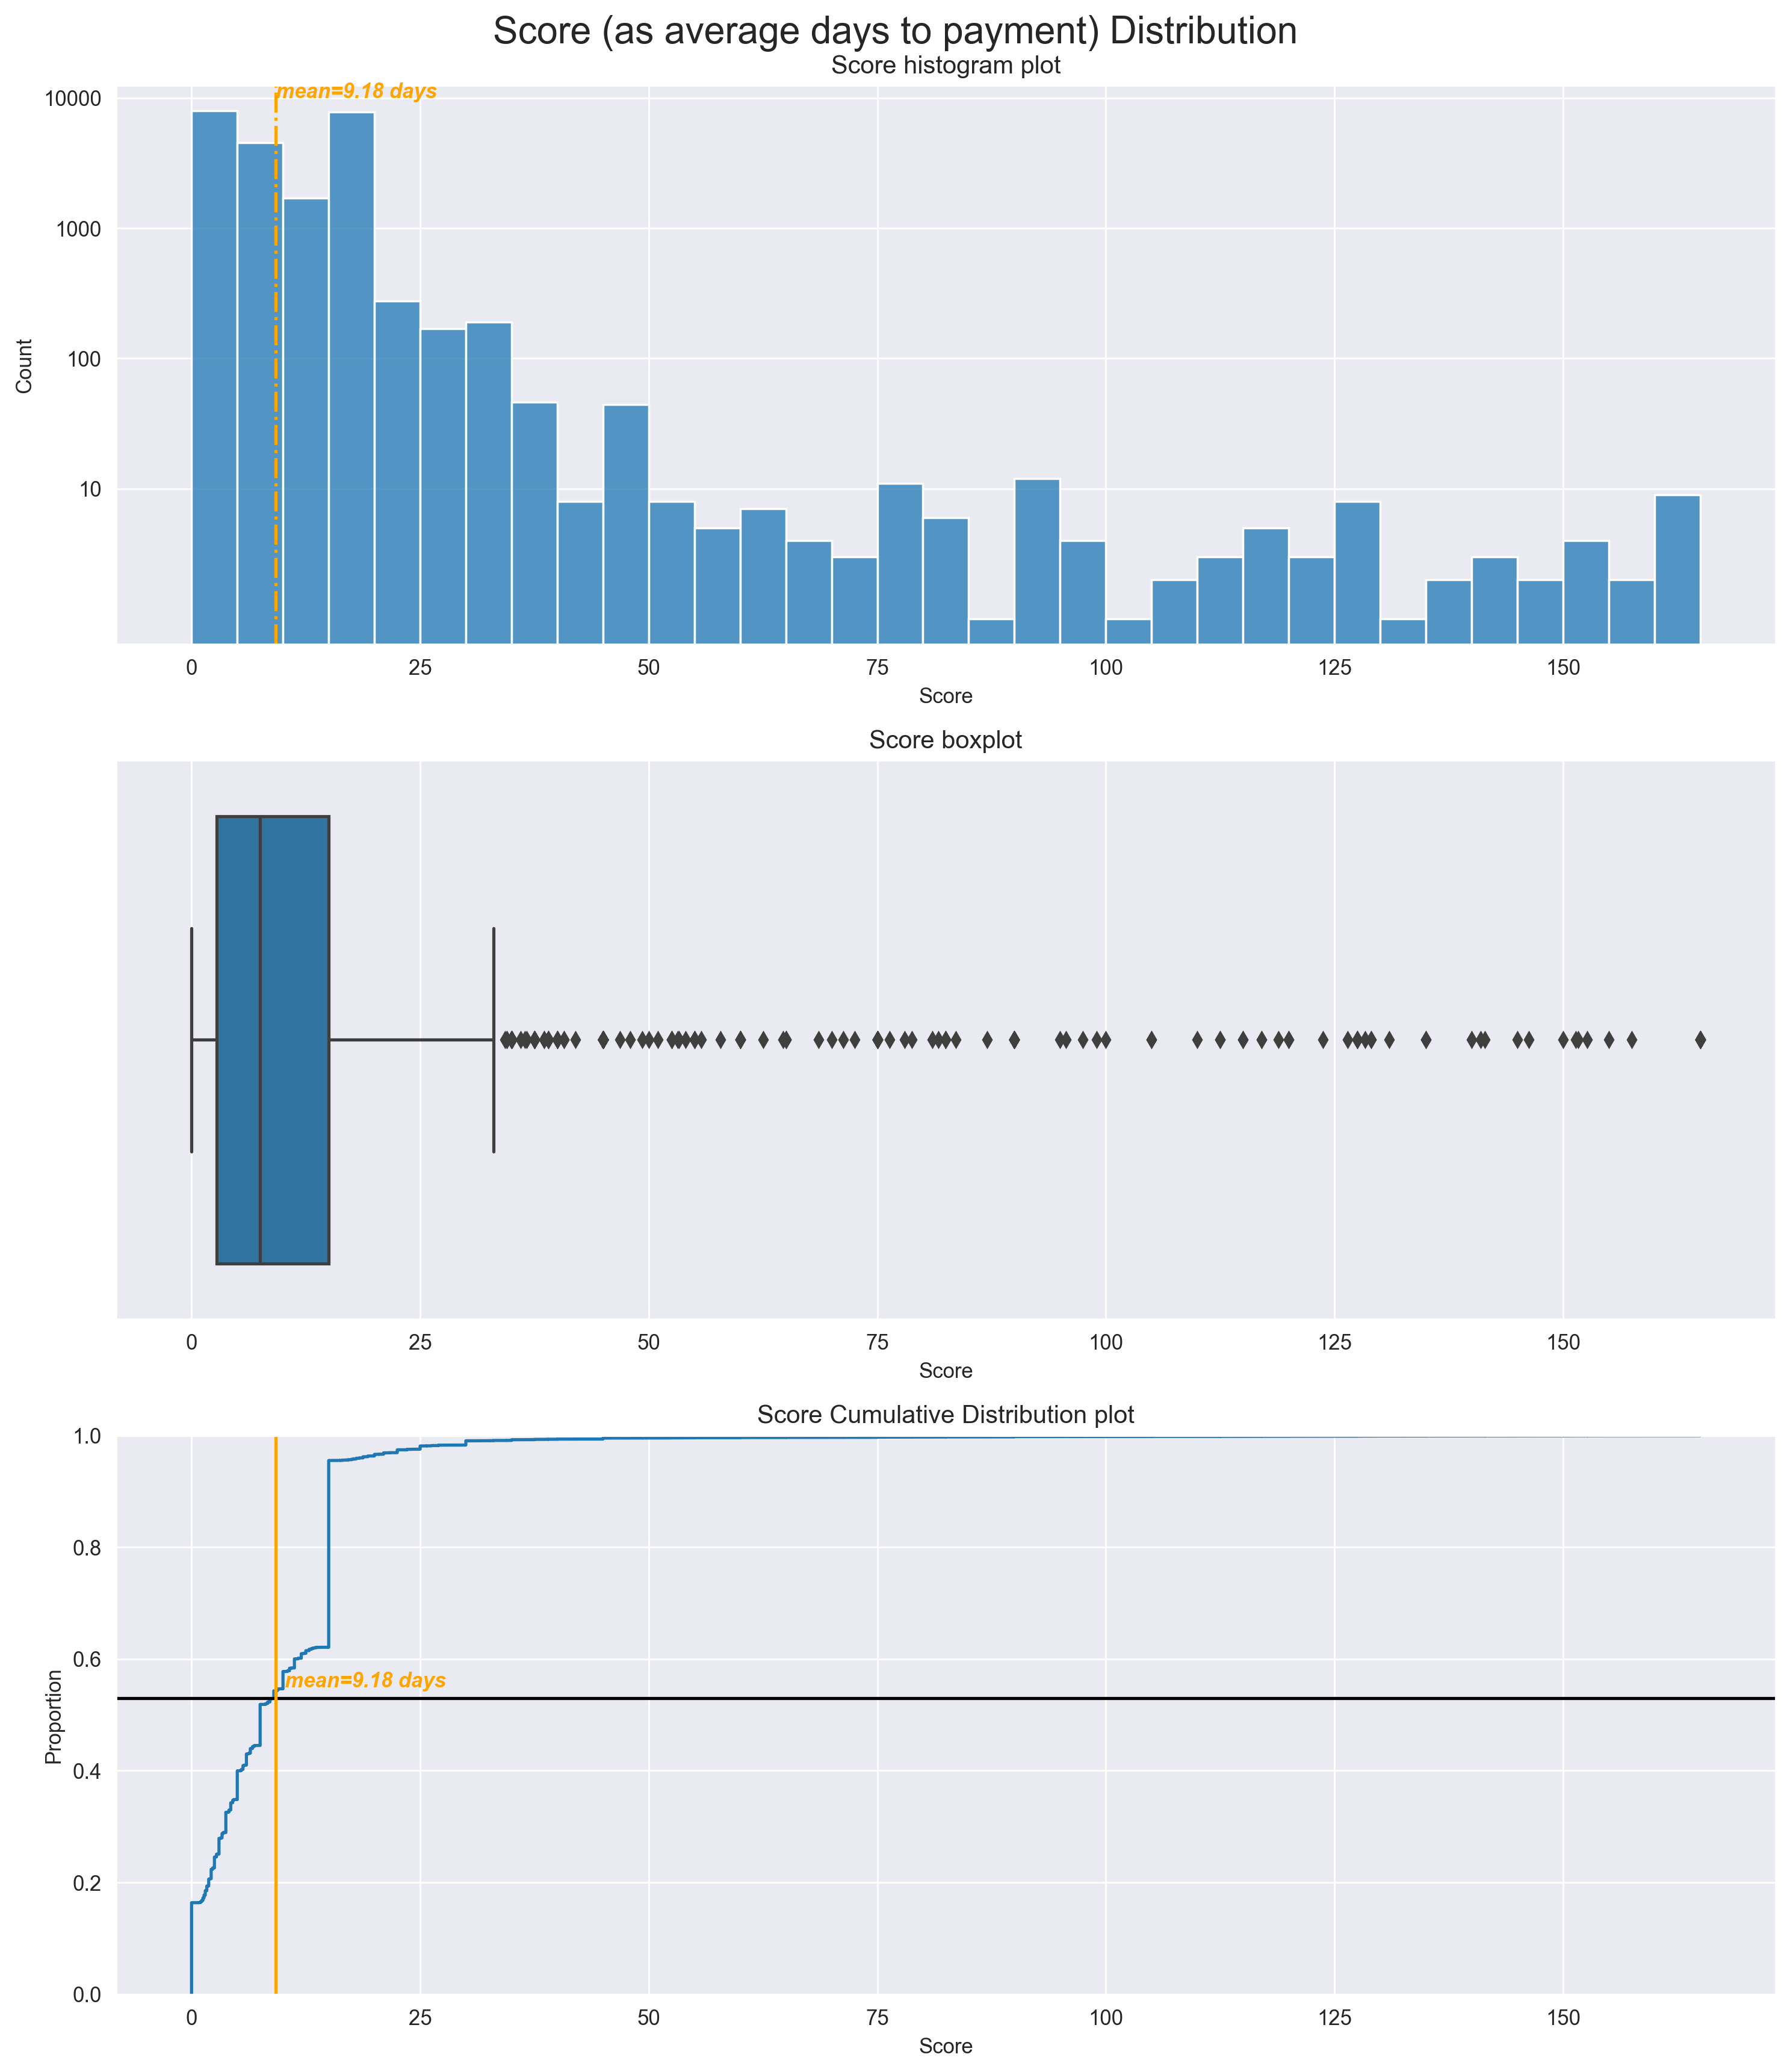

In [90]:
# Detecting Outiliers 

binsize = 5

bins = np.arange(0, score_df['SCORE'].max()+binsize, binsize, )

# creating 3 subplots
fig, axes = plt.subplots(nrows=3,figsize=[12, 14], dpi=250)


# main title:
fig.suptitle("Score (as average days to payment) Distribution", fontsize=18)

# the plots:
sns.histplot(data=score_df, x='SCORE', ax=axes[0], bins=bins, log=True);
sns.boxplot(data=score_df, x='SCORE', ax=axes[1]);
sns.ecdfplot(data=score_df, x='SCORE', ax=axes[2]);

# histogram customization: 
mean_score = np.round(score_df["SCORE"].mean(), 2)
axes[0].axvline(mean_score, color="orange", linestyle="-.", linewidth=1.5)

axes[0].text(
    x=mean_score,
    y=10000,
    s=f"mean={mean_score} days",
    fontweight='bold', 
    fontstyle='italic',
    color='orange'
)

# ecdf customization
axes[2].axhline(0.53, color='black')
axes[2].axvline(mean_score, color='orange')
axes[2].text(
    x=mean_score + 1,
    y=0.55,
    s=f"mean={mean_score} days",
    fontweight='bold', 
    fontstyle='italic',
    color='orange'
)

# log scale histogram customization
axes[0].set_yticks(np.logspace(1, 4, 4), ['10', '100', '1000', '10000']) 

# titles and labels
axes[0].set_title('Score histogram plot')
axes[1].set_title('Score boxplot')
axes[2].set_title('Score Cumulative Distribution plot')
axes[0].set_xlabel("Score");
axes[1].set_xlabel("Score")
axes[2].set_xlabel("Score")
plt.tight_layout()


- A right-skewed histogram and box plot reflects that most of the clients take fewer average days to pay off their loans, and there are fewer clients who take a longer time to pay off their loans.
- The presence of outliers in the box plot could indicate a segment of clients who take significantly longer to pay off their loans. In this case, removing them may not be appropriate, as these data points represent a different segment of clients with longer average days to pay.
- On average, clients take 9.18 days to pay off their loans. The median is close to the mean, which means that around half of the clients take less than 9.18 days to pay off their loans. This can be used to get an idea of the typical time it takes for clients to pay off their loans.

#### Is there a correlation between longevity of employment and total income and credit scores above and below 5 days?

In [91]:
# creating some dfs to where scores are above and equal to 30 and lower and equal to 5. 

score_30 = score_df[score_df['SCORE'] >= 30]
score_5 = score_df[score_df['SCORE'] <= 5]

In [92]:
# creating a scatterplot to check if there is a correlation between being employed for longer and total income for scores above and below 5 days.

score_df['SCORE_BOOL'] = score_df['SCORE']<5

<AxesSubplot: xlabel='AMT_INCOME_TOTAL', ylabel='DAYS_EMPLOYED'>

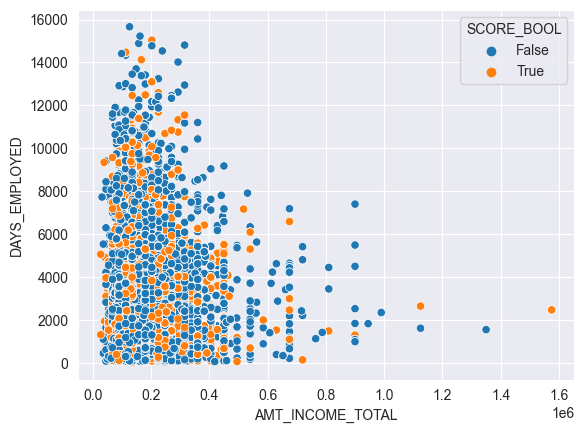

In [93]:
sns.scatterplot(data=score_df, x='AMT_INCOME_TOTAL', y='DAYS_EMPLOYED', hue='SCORE_BOOL')

No correlation was found between days employed and total income.

#### Are there correlations in numeric variables? 

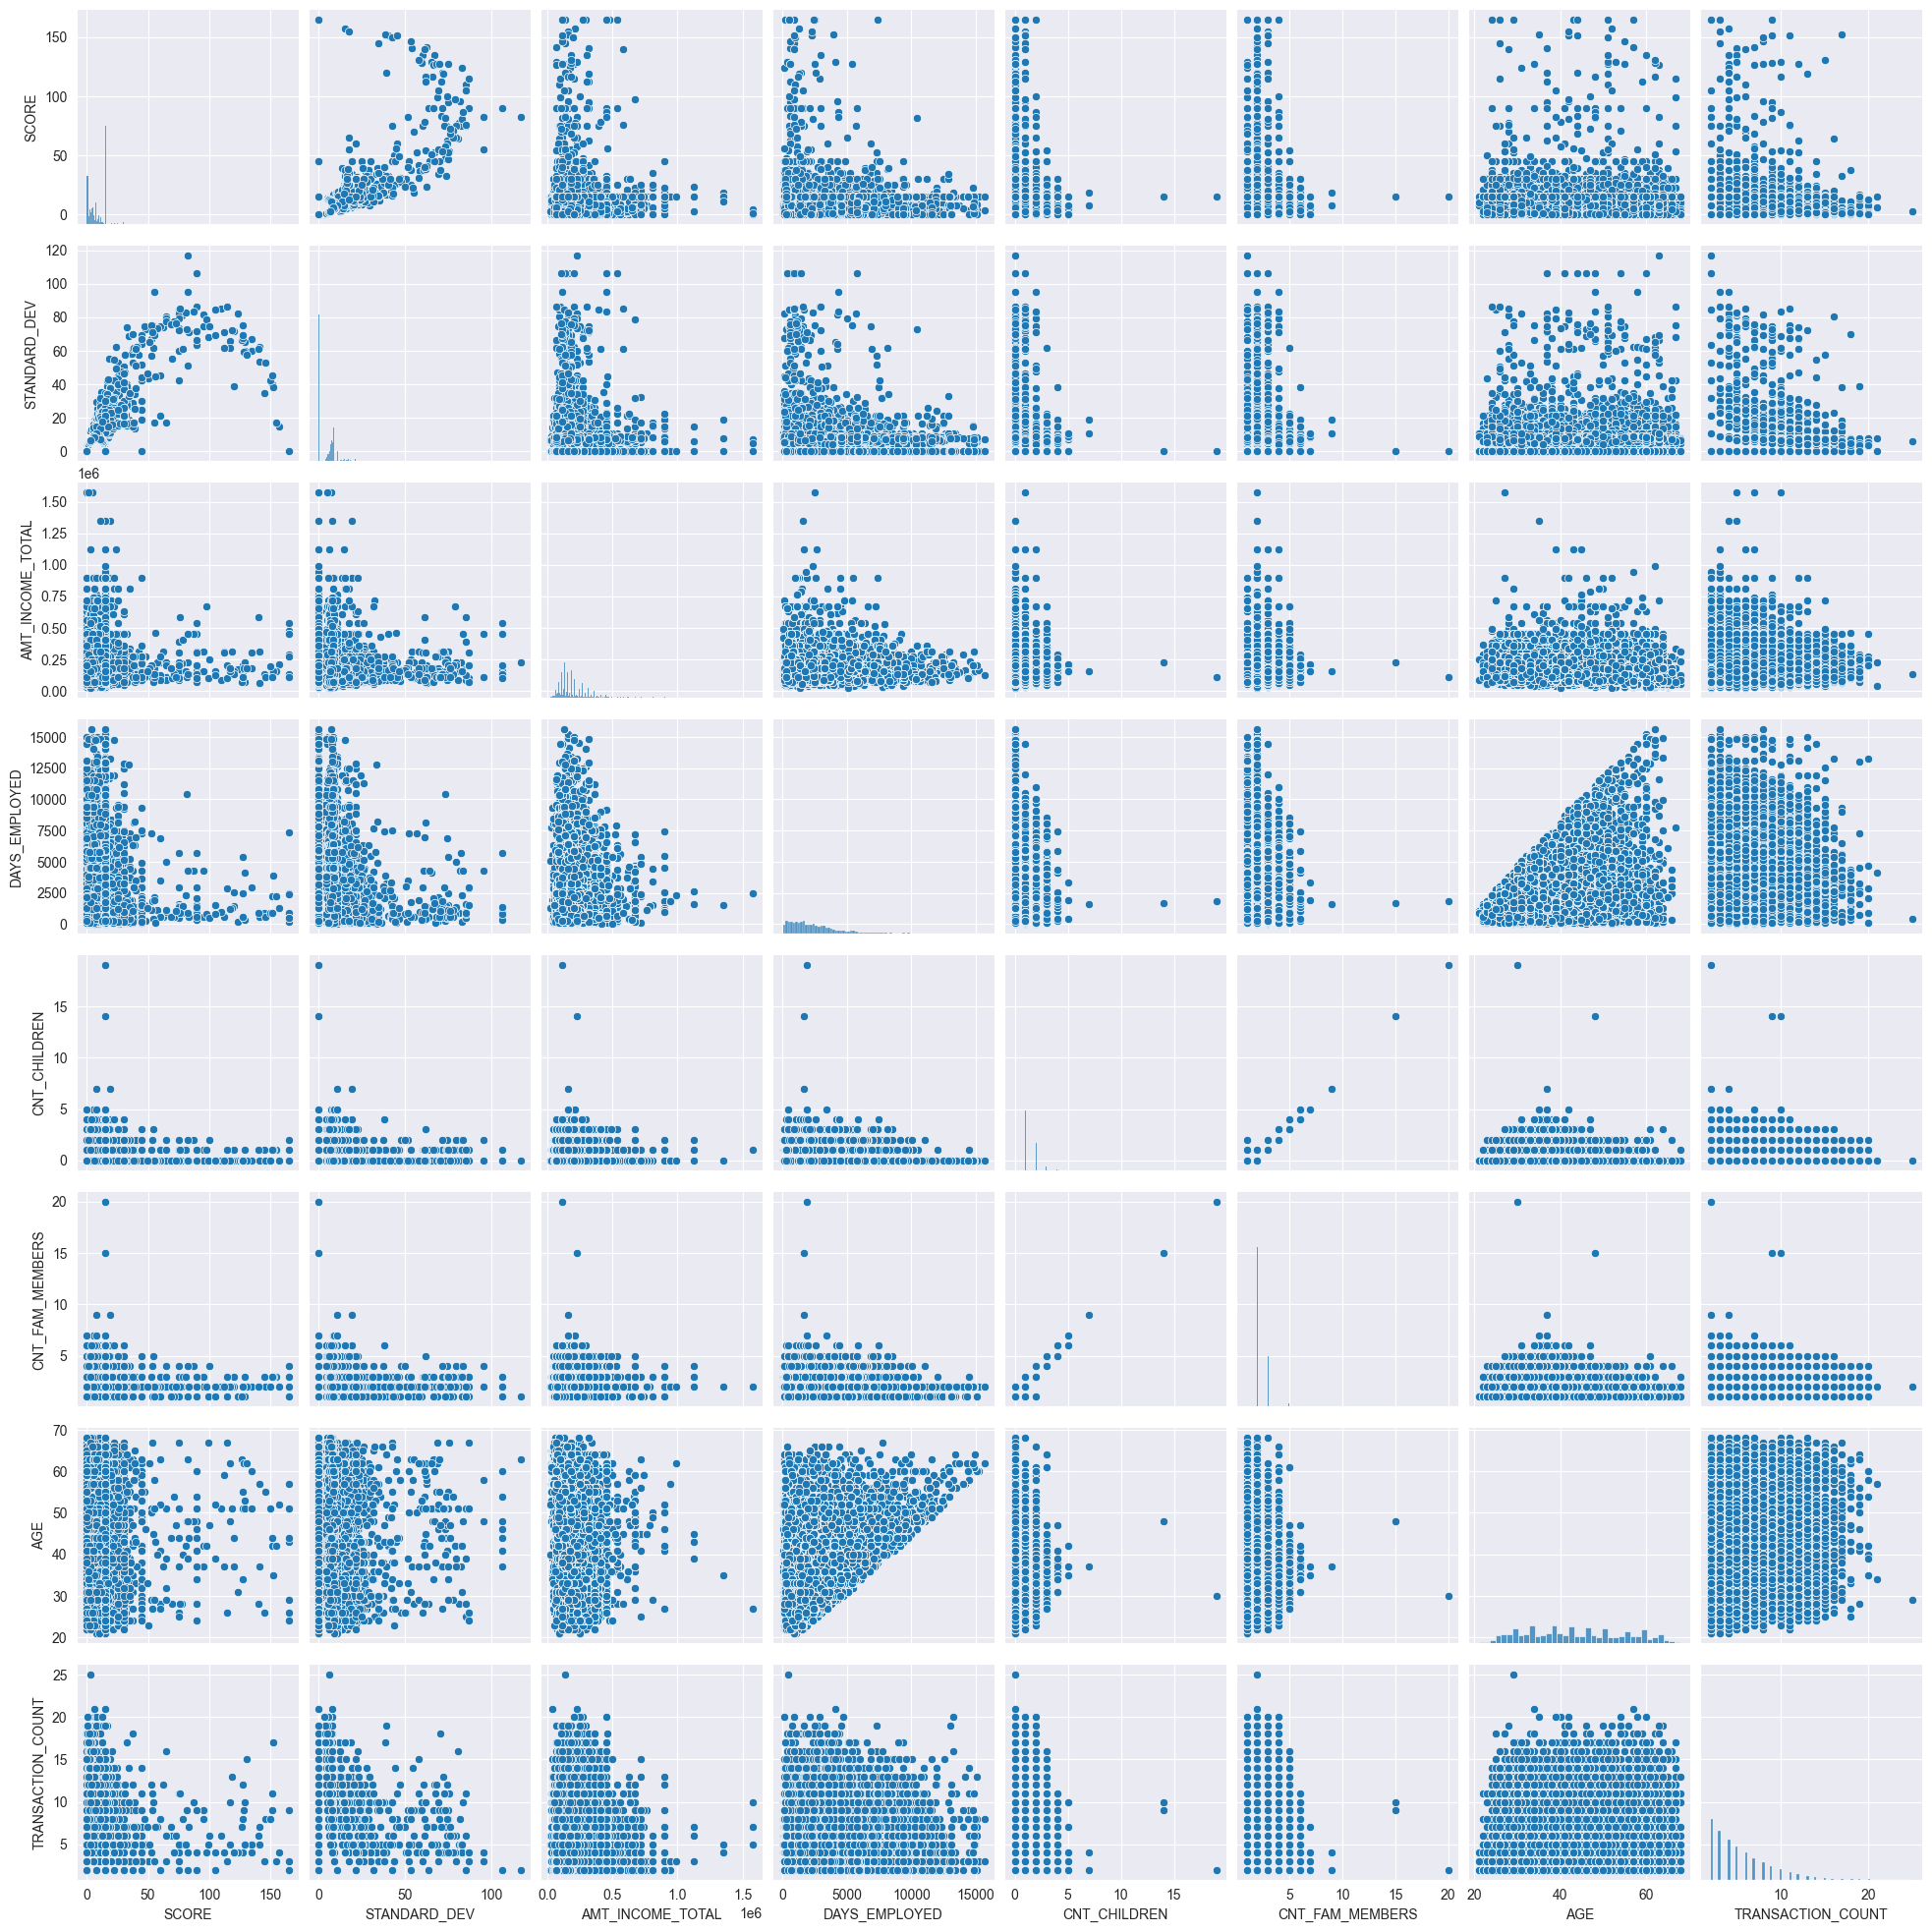

In [94]:
# plot matrix: sample 800 
numeric_vars = ['SCORE','STANDARD_DEV', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED','CNT_CHILDREN','CNT_FAM_MEMBERS', 'AGE', 'TRANSACTION_COUNT']

sns.pairplot(score_df[numeric_vars])

Some possible observations:

* Clients with bad (high) credit scores were't employed for as long as other clients.
* Lower income earners have the highest credit scores. 
* Clients with more children are in lower income ranges.
* Clients with more children have better credit scores.
* Clients with higher transaction counts have slightly lower scores. 
* Clients earning less have higher transaction counts. 

#### Further investigation of observation above that low income earners have higher transaction counts.

[Text(0.5, 1.0, 'Income vs transactions'),
 Text(0.5, 0, 'Income Amount ($)'),
 Text(0, 0.5, 'transactions')]

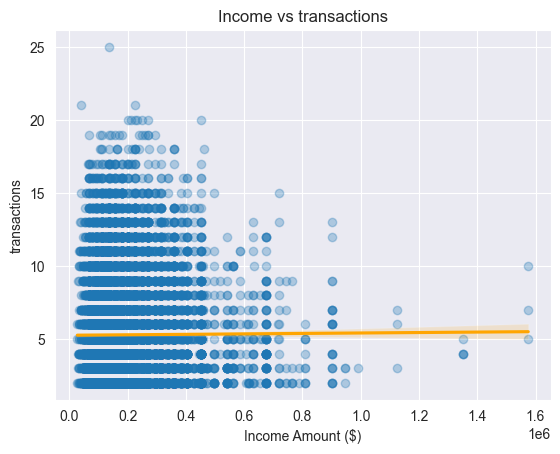

In [95]:
g = sns.regplot(data=score_df, x='AMT_INCOME_TOTAL', y='TRANSACTION_COUNT', 
        scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'});

g.set(title='Income vs transactions',
     xlabel = 'Income Amount ($)',
     ylabel = 'transactions')

No significant correlation exists.

#### Further investigation of observation above that low income earners have highest credit scores.

[Text(0.5, 1.0, 'Income vs Score'),
 Text(0.5, 0, 'Income Amount ($)'),
 Text(0, 0.5, 'Score (avg days to pay)')]

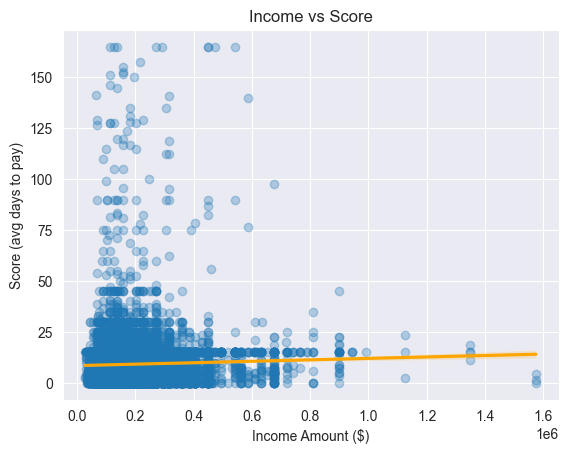

In [96]:
g = sns.regplot(data=score_df, x='AMT_INCOME_TOTAL', y='SCORE', 
        scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'});

g.set(title='Income vs Score',
     xlabel = 'Income Amount ($)',
     ylabel = 'Score (avg days to pay)')

No significant correlation exists.

#### Further investigation that clients not employed for as long have higher scores. 

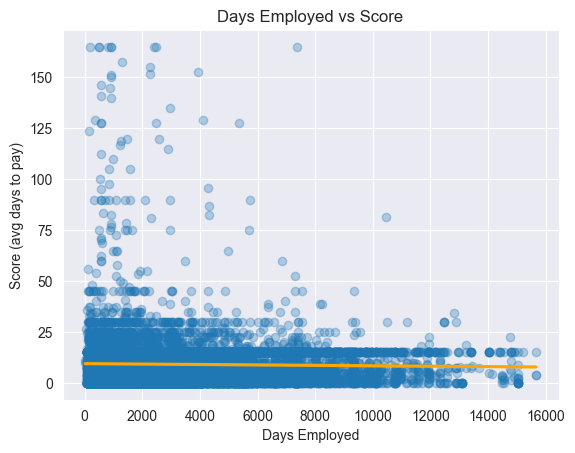

In [97]:
g = sns.regplot(data=score_df, x='DAYS_EMPLOYED', y='SCORE', 
        scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'});

g.set(title='Days Employed vs Score',
     xlabel = 'Days Employed',
     ylabel = 'Score (avg days to pay)');

No significant correlation exists.

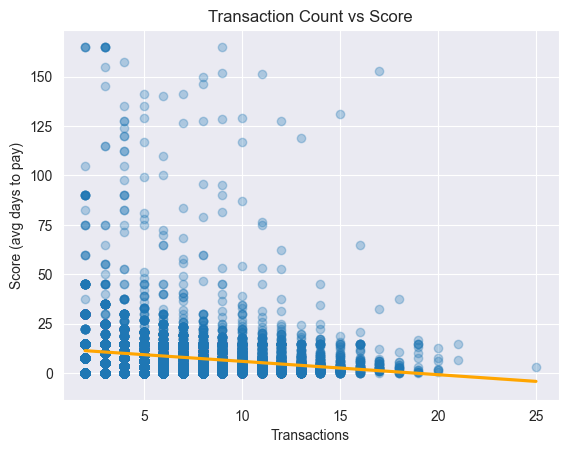

In [98]:
g = sns.regplot(data=score_df, x='TRANSACTION_COUNT', y='SCORE', 
        scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'});

g.set(title='Transaction Count vs Score',
     xlabel = 'Transactions',
     ylabel = 'Score (avg days to pay)');

There is a slight negative correlation between score and transaction count.

#### What is the estimated probability density of total income and count of transactions?

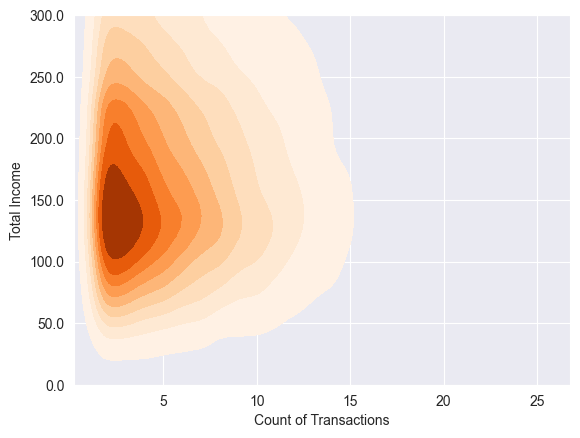

In [99]:
sns.kdeplot(data=score_df, x='TRANSACTION_COUNT', y='AMT_INCOME_TOTAL', cmap="Oranges", fill=True)
plt.xlabel('Count of Transactions')
plt.ylabel('Total Income')
plt.ylim(0, 300000)
yticks = np.arange(0, 300001, 50000)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(yticks/1000)
plt.show()


- The kde shows that a high volume of transactions were below 5 and that a high volume of clients earn between 100k and 200k annually, the data is concentrated around this area. 

### What is the relationship between our categorical data and credit score?

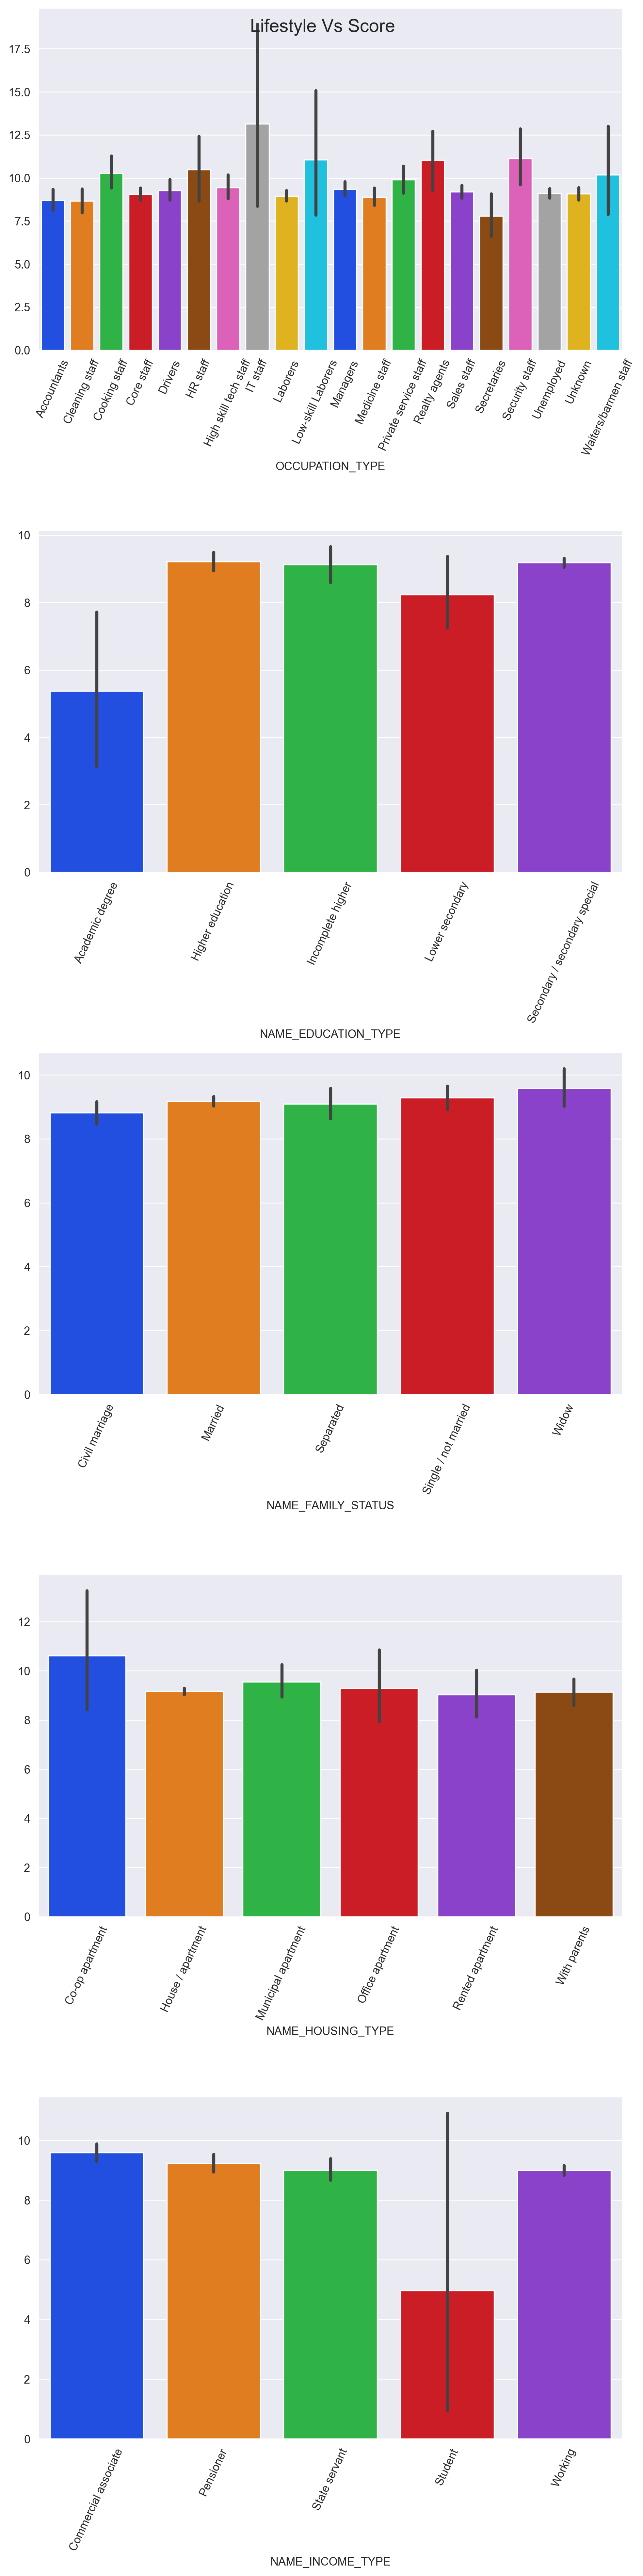

In [100]:
categoric_vars = ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                  'NAME_INCOME_TYPE']

# create a scatter plot with AMT_TOTAL_INCOME on the y-axis, SCORE on the x-axis, and FLAG_OWN_CAR as the color

fig, axes = plt.subplots(5, 1, figsize = [8,32], dpi=250)
fig.suptitle("Lifestyle Vs Score", fontsize=16)

for idx, col in enumerate(categoric_vars):
    sns.barplot(data = score_df, x=col, y= 'SCORE', ax=axes[idx], palette='bright')
    axes[idx].set_ylabel("")
    for idx, ax in enumerate(axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)

plt.tight_layout();


Some observations: 
* Secretaries had the best scores and IT staff the worst.
* Clients with scondary education had the worst scores and academic degrees the best.
* Civil marriages had the best scores and widows the worst.
* Clients living in a co-op apartment had the worst scores and rented apartments the best.
* Commercial associates had the worst scores and students the best.

However, it is impotant that the error bars all overlap or touch in the graphs below, indicating that the differences are not statistically significant. 

# Creating a df containing all clients

## Data Wrangling 2

1. Remove duplicates from all dfs
2. Join all dfs using outer join to preserve all clients 
3. Create a boolean column to identify credit card clients from non-credit card clients. 
4. Hiding NaN values where credit ratings occur but no demographic information is available.
5. Replacing all NaN values in the 'OCCUPATION_TYPE' column with 'Unknown'
6. Inconsistency in data values. Cast columns as boolean datatypes to replace Y and 1 with True and 0 and N with False.
7. Create a new boolean column for employed/unemployed.
8. Columns containing dates need to be calculated. 
- create column EMPLOYEMENT_DATE, contains NaN values where unemployed 
- rename DAYS_BIRTH column to calculated BIRTH_DATE
- replace positive values in DAYS_EMPLOYED column with NaN
9. Replace positive values in DAYS_EMPLOYED with NaN
10. Replace 'Uknown' values in OCCUPATION_TYPE column with 'Unemployed' where EMPLOYMENT is False
11. Casting correct datatypes

### 1. Remove duplicates from all dfs

In [101]:
enriched_flags_copy = enriched_flags_copy.drop_duplicates(subset=['ID'])
enriched_demo_copy = enriched_demo_copy.drop_duplicates(subset=['ID'])
app_record_copy = app_record_copy.drop_duplicates(subset=['ID'])

### 2. Join all dfs using outer join to preserve all clients

In [102]:
#creating a new df with all clients 

all_clients_df = pd.merge(app_record_copy, enriched_demo_copy, how='outer', on=['ID'])
all_clients_df = pd.merge(all_clients_df, enriched_flags_copy, how='outer', on=['ID'])
all_clients_df = pd.merge(all_clients_df, credit_score_df, how='outer', on=['ID'])

In [103]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41628 entries, 0 to 41627
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        41628 non-null  int64  
 1   status_0  41628 non-null  float64
 2   status_1  41628 non-null  float64
 3   status_2  41628 non-null  float64
 4   status_3  41628 non-null  float64
 5   status_4  41628 non-null  float64
 6   status_5  41628 non-null  float64
 7   status_C  41628 non-null  float64
 8   status_X  41628 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.9 MB


In [104]:
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29479 entries, 0 to 29478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29479 non-null  int64  
 1   STANDARD_DEV       29479 non-null  float64
 2   SCORE              29479 non-null  float64
 3   TRANSACTION_COUNT  29479 non-null  int64  
 4   status_0           29479 non-null  float64
 5   status_1           29479 non-null  float64
 6   status_2           29479 non-null  float64
 7   status_3           29479 non-null  float64
 8   status_4           29479 non-null  float64
 9   status_5           29479 non-null  float64
 10  status_C           29479 non-null  float64
 11  status_X           29479 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 2.9 MB


In [105]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22870 entries, 2269 to 29478
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   22870 non-null  string        
 1   STANDARD_DEV         22870 non-null  float64       
 2   SCORE                22870 non-null  float64       
 3   TRANSACTION_COUNT    22870 non-null  int64         
 4   DAYS_EMPLOYED        19055 non-null  float64       
 5   NAME_FAMILY_STATUS   22870 non-null  category      
 6   NAME_HOUSING_TYPE    22870 non-null  category      
 7   NAME_EDUCATION_TYPE  22870 non-null  category      
 8   OCCUPATION_TYPE      22870 non-null  category      
 9   AMT_INCOME_TOTAL     22870 non-null  float64       
 10  NAME_INCOME_TYPE     22870 non-null  category      
 11  CODE_GENDER          22870 non-null  category      
 12  CNT_CHILDREN         22870 non-null  int64         
 13  CNT_FAM_MEMBERS      22870 n

In [106]:
all_clients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445119 entries, 0 to 445118
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAYS_EMPLOYED        438510 non-null  float64
 1   NAME_FAMILY_STATUS   438510 non-null  object 
 2   DAYS_BIRTH           438510 non-null  float64
 3   NAME_HOUSING_TYPE    438510 non-null  object 
 4   ID                   445119 non-null  int64  
 5   NAME_EDUCATION_TYPE  438510 non-null  object 
 6   OCCUPATION_TYPE      304317 non-null  object 
 7   AMT_INCOME_TOTAL     438510 non-null  float64
 8   NAME_INCOME_TYPE     438510 non-null  object 
 9   CODE_GENDER          438510 non-null  object 
 10  CNT_CHILDREN         438510 non-null  float64
 11  CNT_FAM_MEMBERS      438510 non-null  float64
 12  FLAG_OWN_CAR         438510 non-null  object 
 13  FLAG_OWN_REALTY      438510 non-null  object 
 14  FLAG_MOBIL           438510 non-null  float64
 15  FLAG_WORK_PHONE  

### 3. Create a boolean column to identify credit card clients from non-credit card clients. 

In [107]:
def credit_card(score):
    """
    This function checks if a client has a credit card based on the score value.
    
    Parameters:
    score (int): The score of the client.
    
    Returns:
    bool: True if the client has a credit card, False otherwise.
    """
    
    # If the score is greater than or equal to 0, return True
    if score >= 0:
        return True
    # If the score is less than 0, return False
    else:
        return False


In [108]:
# Apply credit card checker function. 

all_clients_df['CREDIT_CARD'] = all_clients_df['SCORE'].apply(credit_card)

### 4. Hiding NaN values where credit ratings occur but no demographic information is available

In [109]:
all_clients_df = all_clients_df[all_clients_df['NAME_FAMILY_STATUS'].notna()]

### 5. Replacing all NaN values in the 'OCCUPATION_TYPE' column with 'Unknown'

In [110]:
# Replace all occurrences of 'null' with 'Unknown'

all_clients_df['OCCUPATION_TYPE'] = all_clients_df['OCCUPATION_TYPE'].fillna('Unknown')

### 6.Inconsistency in data values. Cast columns as boolean datatypes to replace Y and 1 with True and 0 and N with False.

- FLAG_OWN_CAR: object --> bool
- FLAG_OWN_REALTY: object --> bool
- FLAG_MOBIL: float64 --> bool
- FLAG_WORK_PHONE: float64 --> bool
- FLAG_PHONE: float64 --> bool
- FLAG_EMAIL: float64 --> bool

In [111]:
# map 'Y' and 'N' as 1 and 0 in the columns

all_clients_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY']] = all_clients_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].apply(boolean_word)
# create a list of all the boolean columns

# bool_columns = ['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','FLAG_OWN_CAR','FLAG_OWN_REALTY']

# convert all columns to int datatype

all_clients_df[bool_columns] = all_clients_df[bool_columns].astype(int)

# apply boolean function to all columns, which converts columns to boolean datatypes 

all_clients_df[bool_columns] = all_clients_df[bool_columns].apply(boolean_numbers)


### 7. Create a new boolean column for employed/unemployed.

In [112]:
# new boolean column containing employment status

all_clients_df['EMPLOYED'] = all_clients_df['DAYS_EMPLOYED'].apply(employed)

### 8. Columns containing dates need to be calculated. 

- create column EMPLOYEMENT_DATE, contains NaN values where unemployed 
- rename DAYS_BIRTH column to calculated BIRTH_DATE
- replace positive values in DAYS_EMPLOYED column with NaN

In [113]:
# new column containing employment date

all_clients_df['EMPLOYMENT_DATE'] = all_clients_df['DAYS_EMPLOYED'].apply(calculate_date)

# cast column as datetime datatype
all_clients_df['EMPLOYMENT_DATE'] = pd.to_datetime(all_clients_df['EMPLOYMENT_DATE'])

In [114]:
# renamed column containing birthdate

all_clients_df['BIRTH_DATE'] = all_clients_df['DAYS_BIRTH'].apply(calculate_date)

# cast column as datetime datatype

all_clients_df['BIRTH_DATE'] = pd.to_datetime(all_clients_df['BIRTH_DATE'])

In [115]:
# create new age column

all_clients_df['AGE'] = all_clients_df['DAYS_BIRTH'].apply(age)

# drop DAYS_BIRTH column

all_clients_df = all_clients_df.drop("DAYS_BIRTH", axis=1)

### 9. Replace positive values in DAYS_EMPLOYED with NaN

In [116]:
all_clients_df['DAYS_EMPLOYED'] = all_clients_df['DAYS_EMPLOYED'].apply(replace_positive_with_NaN)

### 10. Replace 'Uknown' values in OCCUPATION_TYPE column with 'Unemployed' where EMPLOYMENT is False

In [117]:
all_clients_df.loc[(all_clients_df['EMPLOYED'] == False) & 
                   (all_clients_df['OCCUPATION_TYPE'] == 'Unknown'), 'OCCUPATION_TYPE'] = 'Unemployed'

### 11. Casting correct datatypes 

In [118]:
# casting string columns as string datatypes
all_clients_df['ID'] = all_clients_df['ID'].astype('string')

# casting categoric data column as category datatype
categories = ['NAME_FAMILY_STATUS','CODE_GENDER','OCCUPATION_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_INCOME_TYPE']

all_clients_df[categories] = all_clients_df[categories].astype("category")

# casting number columns as int datatypes 
ints = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS','AMT_INCOME_TOTAL']

all_clients_df[ints] = all_clients_df[ints].astype(int)

### Summary Statistics 2

In [119]:
num_cols = ['DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'STANDARD_DEV', 'SCORE', 'AGE']

all_clients_df[num_cols].describe(include='all').T

count           mean  ...            75%           max
DAYS_EMPLOYED     363186.0    2623.130558  ...    3512.000000  1.753100e+04
AMT_INCOME_TOTAL  438510.0  187525.415158  ...  225000.000000  6.750000e+06
CNT_CHILDREN      438510.0       0.427381  ...       1.000000  1.900000e+01
CNT_FAM_MEMBERS   438510.0       2.194463  ...       3.000000  2.000000e+01
STANDARD_DEV       22870.0       4.730212  ...       7.745967  1.166726e+02
SCORE              22870.0       9.175724  ...      15.000000  1.650000e+02
AGE               438510.0      43.326816  ...      53.000000  6.900000e+01

[7 rows x 8 columns]

In [120]:
# summary statistics for categorical columns
cat_cols = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_GENDER',
            'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'EMPLOYED', 'EMPLOYMENT_DATE', 'BIRTH_DATE', 'CREDIT_CARD']
all_clients_df[cat_cols].describe(include='all')

NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...           BIRTH_DATE CREDIT_CARD
count              438510             438510  ...               438510      438510
unique                  5                  6  ...                16379           2
top               Married  House / apartment  ...  1991-01-28 00:00:00       False
freq               299798             393791  ...                  150      415640
first                 NaN                NaN  ...  1954-02-17 00:00:00         NaN
last                  NaN                NaN  ...  2002-08-16 00:00:00         NaN

[6 rows x 16 columns]

### Exporting the dataset

- The majority of the exploratory analysis was continued in Tableau using the exported data.

In [121]:
# exporting the dataframe containing all client information

all_clients_df.to_csv('all_clients_credit_approval.csv', index=False)

all_clients_df.columns

Index(['DAYS_EMPLOYED', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ID',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'STANDARD_DEV', 'SCORE',
       'TRANSACTION_COUNT', 'status_0', 'status_1', 'status_2', 'status_3',
       'status_4', 'status_5', 'status_C', 'status_X', 'CREDIT_CARD',
       'EMPLOYED', 'EMPLOYMENT_DATE', 'BIRTH_DATE', 'AGE'],
      dtype='object')

In [122]:
all_clients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438509
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DAYS_EMPLOYED        363186 non-null  float64       
 1   NAME_FAMILY_STATUS   438510 non-null  category      
 2   NAME_HOUSING_TYPE    438510 non-null  category      
 3   ID                   438510 non-null  string        
 4   NAME_EDUCATION_TYPE  438510 non-null  category      
 5   OCCUPATION_TYPE      438510 non-null  category      
 6   AMT_INCOME_TOTAL     438510 non-null  int64         
 7   NAME_INCOME_TYPE     438510 non-null  category      
 8   CODE_GENDER          438510 non-null  category      
 9   CNT_CHILDREN         438510 non-null  int64         
 10  CNT_FAM_MEMBERS      438510 non-null  int64         
 11  FLAG_OWN_CAR         438510 non-null  bool          
 12  FLAG_OWN_REALTY      438510 non-null  bool          
 13  FLAG_MOBIL    

### Distribution Analysis for credit card and non-credit card holders. 

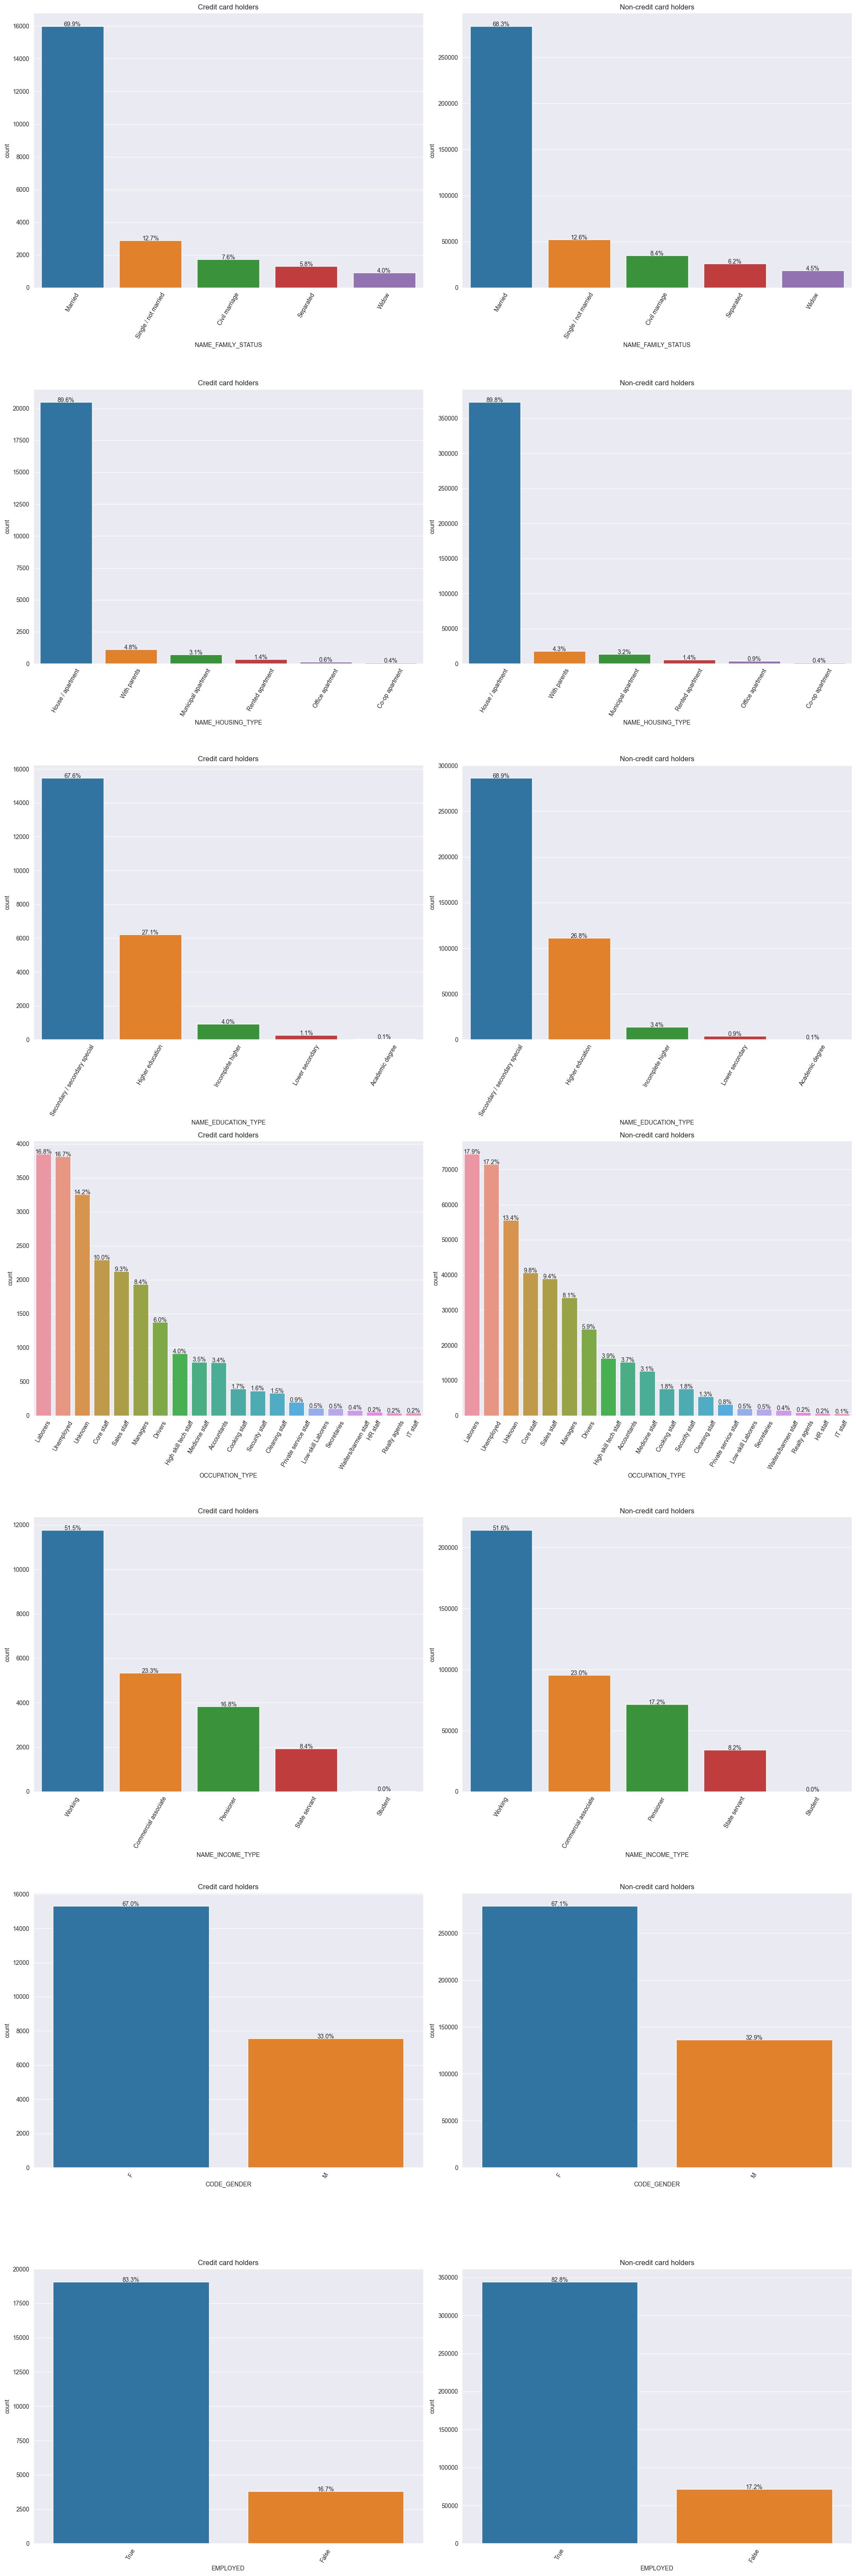

In [123]:
no_credit_df = all_clients_df[all_clients_df['CREDIT_CARD'] == 0]

fig, axs = plt.subplots(7, 2, figsize=(20, 60), squeeze=False)

plot_names = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
            'NAME_INCOME_TYPE', 'CODE_GENDER','EMPLOYED']

data_sets = [score_df, no_credit_df]
        
for i, plot_name in enumerate(plot_names):
    for j, data in enumerate(data_sets):
        counts = data[plot_name].value_counts()
        ax = sns.countplot(x=plot_name, data=data, order=counts.index, ax=axs[i][j])
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 1, '{:.1%}'.format(height / len(data)), ha="center")
        axs[i][j].set_title(['Credit card holders', 'Non-credit card holders'][j])
        axs[i][j].set_xticklabels(counts.index, rotation=60)

plt.tight_layout()
plt.show()



* There in no significant difference in the percentage of clients in each category of the credit card holders and non-credit card holders. The ditributions are the same and so none of these factors influence whether a client has a credit card. 

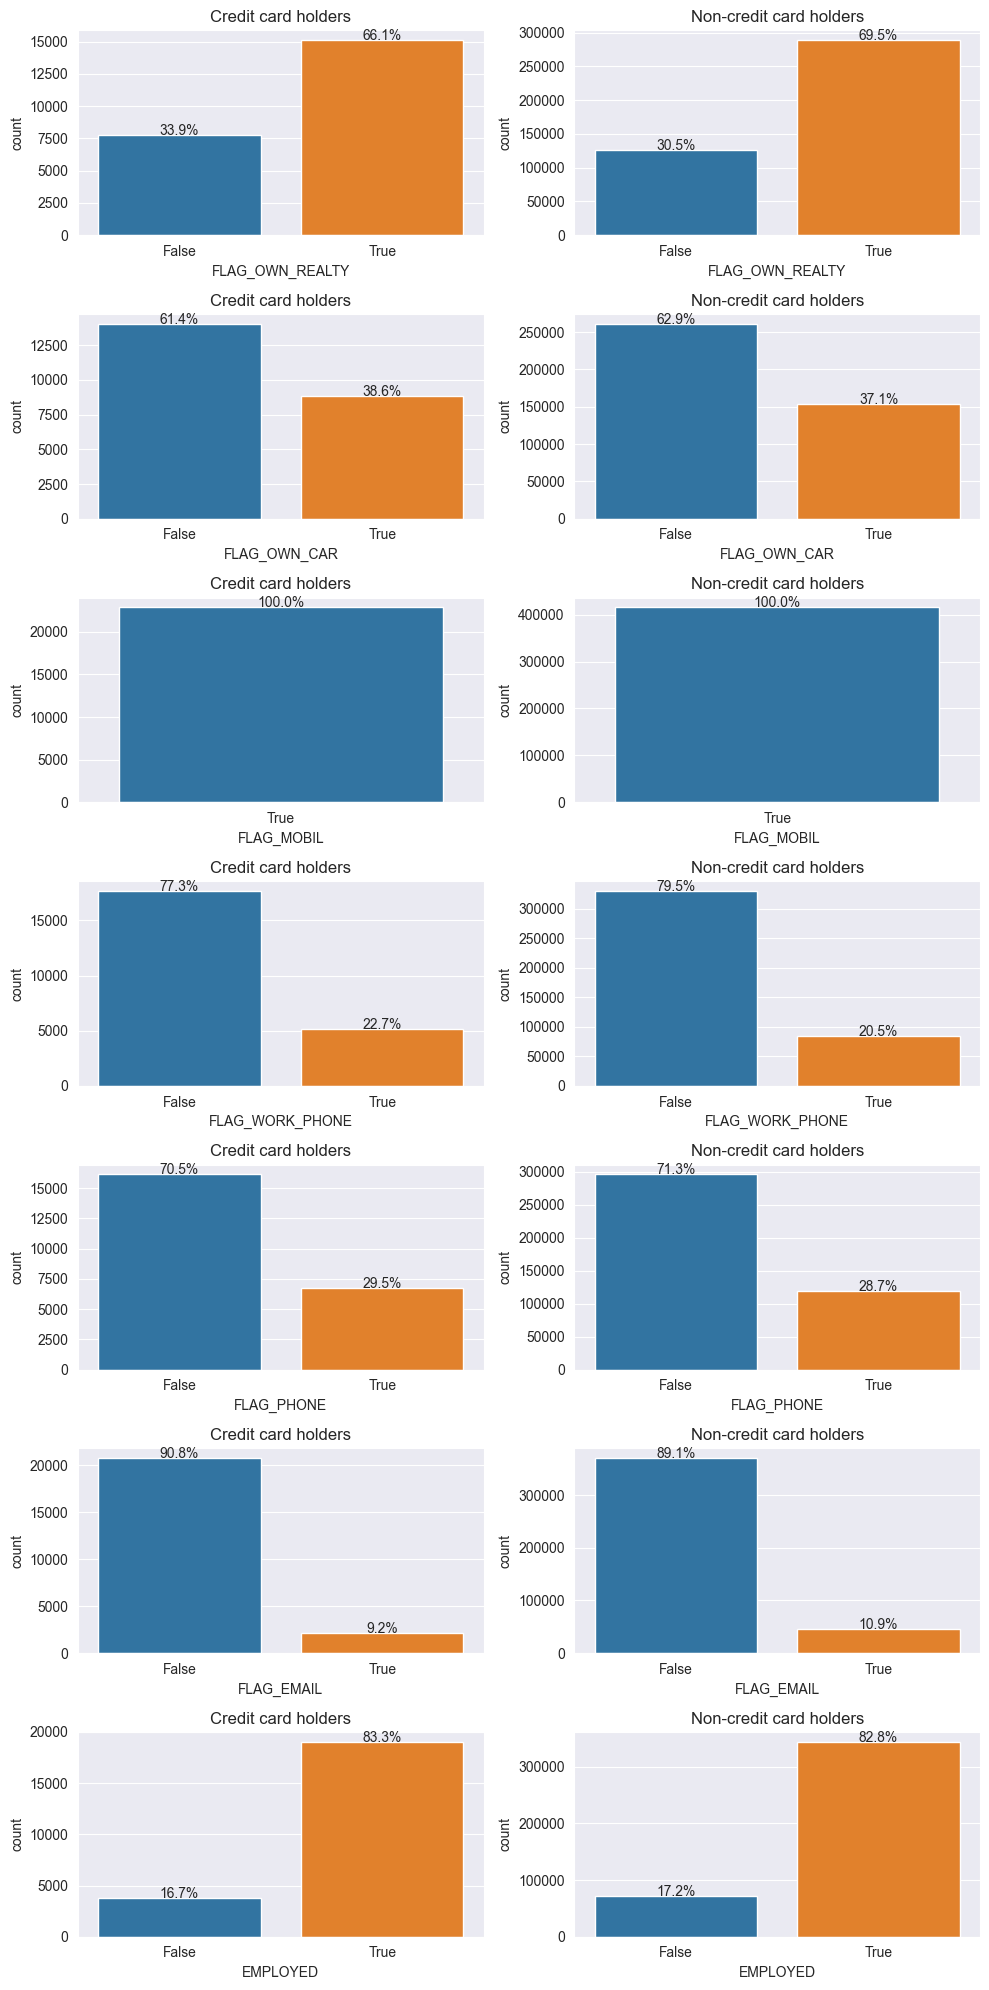

In [124]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20), squeeze=False)

plot_names = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'EMPLOYED']
data_sets = [score_df, no_credit_df]

for i, plot_name in enumerate(plot_names):
    for j, data in enumerate(data_sets):
        ax = sns.countplot(data=data, x=plot_name, ax=axs[i][j])
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 1, '{:.1%}'.format(height / len(data)), ha="center")
        axs[i][j].set_title(['Credit card holders', 'Non-credit card holders'][j])

plt.tight_layout()
plt.show()


Although the distributions are the same, there are slight differences in the percentage of clients having credit cards and not having credit cards. For exmaple, there is a slightly higher percentage of car owners and work phones with credit cards.

## Conclusions

Key findings from Python exploration:

* The distribution of clients in all categories is the same regardless of whether the clients hold a credit card. Therefore it cannot be concluded that there are any factors e.g. unemployment or owning realty which influence the likelyhood of a client holding a credit card. 
* On average a credit card loan is paid off in 9.18 days.
* Less than 10 percent of the clientele pay off loans on average after 30 days. 
* There are no significant correlations found between a clients ability to pay off a loan early and any demographic factors. 
* There are no significant correlations found between a clients transaction count and any demographic factors.
* The data is not evenly distributed among different client sectors. 
	* There is a 2:1 female to male ratio.
	* 70% of clients are married.
	* 90% of clients live in a house or apartment.
	* Over 30% of the clients are unemployed or occupation unknown.
	* 17% of the clients are laborers. 
	* Around 30% of clients own realty.
	* Over 60% of clients own a car.
	* All clients own a mobile phone.
	* The average AMT income total is 187,525.

## Data Enrichment

The orginal objective in this analysis was to create some credit rating which could be used to determine whether future clients would be good candidates for credit cards based on behaviour/credit history of current credit card holders. The main setback in this investigation is a lack of data around existing credit transaction details and credit history. The number of clients are too low in areas where poor credit scores were observed.

In order to build a useful credit model, we would need to:

1. Define the key business objectives around building a score. i.e. what is the optimal loan period, loan amount and frequency for example. 
2. Gather more data. i.e. transaction history and details e.g.
	* transaction amount
	* transaction category
	* interest rate 
	* payment history
	* length of credit history
	* types of credit used
	* number of inquiries made
3. Feature Engineering: e.g. 
	* calculating debt-to-income ratio 
	* average transaction amount 
	* number of missed payments
	* average payment history
5. Model Selection to capture relationships between the features and the credit scores. Some machine learning models I found include: logistic regression, decision trees, and random forests.
6. Evaluating multiple models to determine which one is best suited to the problem at hand. The evaluation should be based on performance metrics such as accuracy, precision, and recall.
7. Model Training to automate the credit scoring process and make it more objective, efficient, and accurate. Cross-validation can be used to determine the best parameters.

### Final thoughts on improving the data at hand

In this analysis I have attempted to create some features i.e. number of transactions and credit score (based on average days to pay back a loan). Some additional features could maybe be included from the data at hand, such as, number of missed payments per client. Another feature that could be included in this dataset is the frequency of use since the first transaction was made per client. The number of transactions really refer to the number of months a credit card has been used and it would be helpful to instead have the number of transactions per month and the amount thereof.